In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.9


In [3]:
#!pip install tensorflow

In [4]:
# pip install ipython jupyter

# ajuda a fazer o jupyter notebook usar as dependencias do pip

In [5]:
# Imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## carregando os dados .csv

In [6]:
#pegar "dataset geral" e depois dividir em x_treino e y_treino

dataset_train_variants = pd.read_csv("projeto7-data_files/data_files/training_variants.csv")
dataset_train_text = pd.read_csv("projeto7-data_files/data_files/training_text.csv", sep=r"\|\|", engine='python')

dataset_test_variants = pd.read_csv("projeto7-data_files/data_files/test_variants.csv")
dataset_test_text = pd.read_csv("projeto7-data_files/data_files/test_text.csv", sep=r"\|\|", engine='python')

In [7]:
dataset_train_variants

ID    Gene             Variation  Class
0        0  FAM58A  Truncating Mutations      1
1        1     CBL                 W802*      2
2        2     CBL                 Q249E      2
3        3     CBL                 N454D      3
4        4     CBL                 L399V      4
...    ...     ...                   ...    ...
3316  3316   RUNX1                 D171N      4
3317  3317   RUNX1                 A122*      1
3318  3318   RUNX1               Fusions      1
3319  3319   RUNX1                  R80C      4
3320  3320   RUNX1                  K83E      4

[3321 rows x 4 columns]

In [8]:
dataset_train_text

ID                                               Text
0      0  Cyclin-dependent kinases (CDKs) regulate a var...
1      1   Abstract Background  Non-small cell lung canc...
2      2   Abstract Background  Non-small cell lung canc...
3      3  Recent evidence has demonstrated that acquired...
4      4  Oncogenic mutations in the monomeric Casitas B...
..   ...                                                ...
134  134  The splicing factor SF3B1 is the most commonly...
135  135  Mutations in genes encoding proteins involved ...
136  136  Precursor mRNA splicing is catalyzed by the sp...
137  137  Malignant mesothelioma (MM) is an aggressive n...
138  138                                             Non–sm

[139 rows x 2 columns]

In [9]:
# dataset_train_text["Text"][0]


In [10]:
dataset_train_variants["Gene"].unique()

array(['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB',
       'SHQ1', 'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP',
       'TGFBR1', 'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', 'SF3B1',
       'LATS2', 'EGFR', 'NKX2-1', 'EIF1AX', 'ARID2', 'BRD4', 'HIST1H1C',
       'ERRFI1', 'CHEK2', 'PAK1', 'TMPRSS2', 'H3F3A', 'ELF3', 'ROS1',
       'ASXL2', 'CDH1', 'EPCAM', 'EP300', 'EPAS1', 'TP53', 'TP53BP1',
       'SMAD2', 'SMAD3', 'SMAD4', 'CDK4', 'AURKB', 'CDK6', 'FBXW7',
       'CDK8', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'ASXL1',
       'ERBB2', 'ERBB3', 'ERBB4', 'ERCC2', 'BRIP1', 'ERCC3', 'ERCC4',
       'ABL1', 'CEBPA', 'ERG', 'HLA-A', 'HLA-B', 'PDGFRA', 'PDGFRB',
       'RBM10', 'KDM5C', 'ESR1', 'ETV1', 'ETV6', 'TSC1', 'IKZF1', 'TSC2',
       'EWSR1', 'ACVR1', 'FOXA1', 'MDM2', 'ARID1A', 'EZH2', 'MDM4',
       'KLF4', 'RXRA', 'MAP3K1', 'AXIN1', 'BAP1', 'MEN1', 'FANCA',
       'FANCC', 'MET', 'U2AF1', 'KMT2C', 'FAT1', 'ARID1B', 'PIK3CA',
       'PIK3CB', 'PIM1

In [11]:
dataset_train_variants["Gene"].value_counts().get("CBL", 0)

np.int64(25)

### Combinando os datasets(futuramente ver correlação dos textos com gene e variationn para um melhor preenchimento dos Text vazios)

In [12]:
geral_dataset_train = pd.merge(dataset_train_variants, dataset_train_text, on="ID", how="left")

In [13]:
geral_dataset_train

ID    Gene             Variation  Class  \
0        0  FAM58A  Truncating Mutations      1   
1        1     CBL                 W802*      2   
2        2     CBL                 Q249E      2   
3        3     CBL                 N454D      3   
4        4     CBL                 L399V      4   
...    ...     ...                   ...    ...   
3316  3316   RUNX1                 D171N      4   
3317  3317   RUNX1                 A122*      1   
3318  3318   RUNX1               Fusions      1   
3319  3319   RUNX1                  R80C      4   
3320  3320   RUNX1                  K83E      4   

                                                   Text  
0     Cyclin-dependent kinases (CDKs) regulate a var...  
1      Abstract Background  Non-small cell lung canc...  
2      Abstract Background  Non-small cell lung canc...  
3     Recent evidence has demonstrated that acquired...  
4     Oncogenic mutations in the monomeric Casitas B...  
...                                                 ...  
3316                                                NaN  
3317                                                NaN  
3318                                                NaN  
3319                                                NaN  
3320                                                NaN  

[3321 rows x 5 columns]

In [14]:
geral_dataset_train["Text"] = geral_dataset_train["Text"].fillna(geral_dataset_train["Gene"]) + " " + geral_dataset_train["Variation"]
# geral_dataset_train.dropna(inplace=True)

In [15]:
geral_dataset_train

ID    Gene             Variation  Class  \
0        0  FAM58A  Truncating Mutations      1   
1        1     CBL                 W802*      2   
2        2     CBL                 Q249E      2   
3        3     CBL                 N454D      3   
4        4     CBL                 L399V      4   
...    ...     ...                   ...    ...   
3316  3316   RUNX1                 D171N      4   
3317  3317   RUNX1                 A122*      1   
3318  3318   RUNX1               Fusions      1   
3319  3319   RUNX1                  R80C      4   
3320  3320   RUNX1                  K83E      4   

                                                   Text  
0     Cyclin-dependent kinases (CDKs) regulate a var...  
1      Abstract Background  Non-small cell lung canc...  
2      Abstract Background  Non-small cell lung canc...  
3     Recent evidence has demonstrated that acquired...  
4     Oncogenic mutations in the monomeric Casitas B...  
...                                                 ...  
3316                                        RUNX1 D171N  
3317                                        RUNX1 A122*  
3318                                      RUNX1 Fusions  
3319                                         RUNX1 R80C  
3320                                         RUNX1 K83E  

[3321 rows x 5 columns]

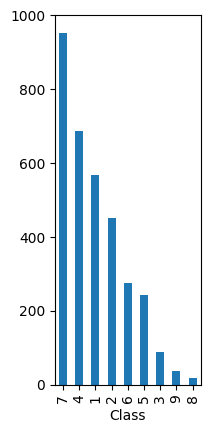

In [16]:
# Quqnaitdade por tipo de classe:
plt.subplot(1,3,1)
plt.xlabel("Class")
count_values_class_type = geral_dataset_train["Class"].value_counts()
count_values_class_type.plot(kind="bar")

plt.show()

### Análise e Exploração dos dados

##### Transaformar valores de texto para número(Gene e Variation) - Treino

In [17]:
geral_dataset_train["Gene"].unique()

array(['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB',
       'SHQ1', 'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP',
       'TGFBR1', 'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', 'SF3B1',
       'LATS2', 'EGFR', 'NKX2-1', 'EIF1AX', 'ARID2', 'BRD4', 'HIST1H1C',
       'ERRFI1', 'CHEK2', 'PAK1', 'TMPRSS2', 'H3F3A', 'ELF3', 'ROS1',
       'ASXL2', 'CDH1', 'EPCAM', 'EP300', 'EPAS1', 'TP53', 'TP53BP1',
       'SMAD2', 'SMAD3', 'SMAD4', 'CDK4', 'AURKB', 'CDK6', 'FBXW7',
       'CDK8', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'ASXL1',
       'ERBB2', 'ERBB3', 'ERBB4', 'ERCC2', 'BRIP1', 'ERCC3', 'ERCC4',
       'ABL1', 'CEBPA', 'ERG', 'HLA-A', 'HLA-B', 'PDGFRA', 'PDGFRB',
       'RBM10', 'KDM5C', 'ESR1', 'ETV1', 'ETV6', 'TSC1', 'IKZF1', 'TSC2',
       'EWSR1', 'ACVR1', 'FOXA1', 'MDM2', 'ARID1A', 'EZH2', 'MDM4',
       'KLF4', 'RXRA', 'MAP3K1', 'AXIN1', 'BAP1', 'MEN1', 'FANCA',
       'FANCC', 'MET', 'U2AF1', 'KMT2C', 'FAT1', 'ARID1B', 'PIK3CA',
       'PIK3CB', 'PIM1

In [18]:
geral_dataset_train["Variation"].unique()

array(['Truncating Mutations', 'W802*', 'Q249E', ..., 'A122*', 'R80C',
       'K83E'], dtype=object)

In [19]:
geral_dataset_train["GeneId"],_ = pd.factorize(geral_dataset_train["Gene"])
geral_dataset_train["VariationId"],_ = pd.factorize(geral_dataset_train["Variation"])

In [20]:
geral_dataset_train

ID    Gene             Variation  Class  \
0        0  FAM58A  Truncating Mutations      1   
1        1     CBL                 W802*      2   
2        2     CBL                 Q249E      2   
3        3     CBL                 N454D      3   
4        4     CBL                 L399V      4   
...    ...     ...                   ...    ...   
3316  3316   RUNX1                 D171N      4   
3317  3317   RUNX1                 A122*      1   
3318  3318   RUNX1               Fusions      1   
3319  3319   RUNX1                  R80C      4   
3320  3320   RUNX1                  K83E      4   

                                                   Text  GeneId  VariationId  
0     Cyclin-dependent kinases (CDKs) regulate a var...       0            0  
1      Abstract Background  Non-small cell lung canc...       1            1  
2      Abstract Background  Non-small cell lung canc...       1            2  
3     Recent evidence has demonstrated that acquired...       1            3  
4     Oncogenic mutations in the monomeric Casitas B...       1            4  
...                                                 ...     ...          ...  
3316                                        RUNX1 D171N     263         2992  
3317                                        RUNX1 A122*     263         2993  
3318                                      RUNX1 Fusions     263          261  
3319                                         RUNX1 R80C     263         2994  
3320                                         RUNX1 K83E     263         2995  

[3321 rows x 7 columns]

In [21]:
#verificar vbalores nulos:
geral_dataset_train.isnull().sum()

ID             0
Gene           0
Variation      0
Class          0
Text           0
GeneId         0
VariationId    0
dtype: int64

In [22]:
# def generate_box_plot_list(list_continuos):
#     fig = plt.figure(figsize = (12, 8))

#     df['nome_da_coluna'].plot.box()
    
#     plt.savefig("images/boxplot.png")

In [23]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import seaborn as sns

In [25]:
# fig = plt.figure(figsize = (12,8))
# ax = geral_dataset_train[['GeneId']].plot.box()

# for column in ['GeneId']:
#     plt.tight_layout()
#     sns.stripplot(data=geral_dataset_train, x=column, jitter=True, color='black', size=0.5, ax=ax)

# plt.show()

<Axes: >

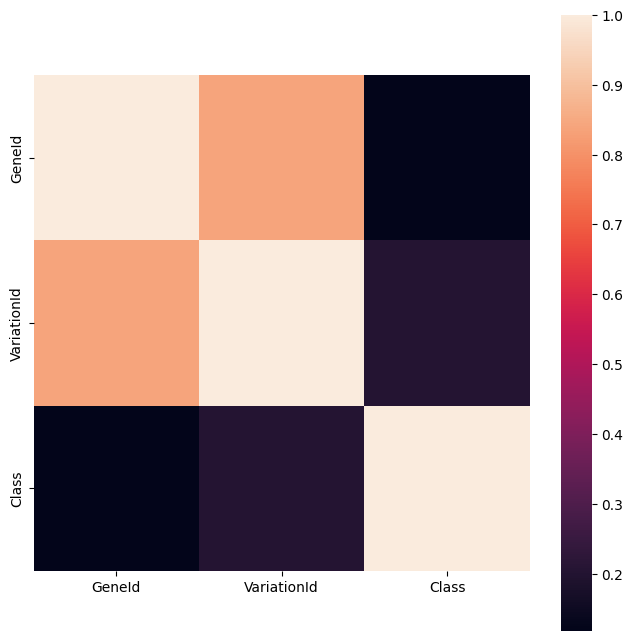

In [26]:
#matriz de correlação:
plt.figure(figsize = (8,8))

sns.heatmap(geral_dataset_train[[
    "GeneId",
    "VariationId",
    "Class"
]].corr(), vmax=1., square=True)

#### gráficos de como a Class é influenciada pela Variation e Gene Ids:

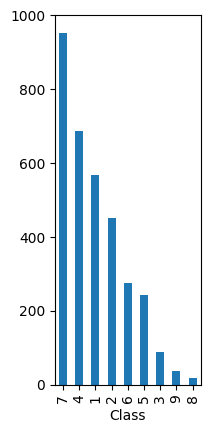

In [27]:
# Quqnaitdade por tipo de classe:
plt.subplot(1,3,1)
plt.xlabel("Class")
count_values_class_type = geral_dataset_train["Class"].value_counts()
count_values_class_type.plot(kind="bar")

plt.show()

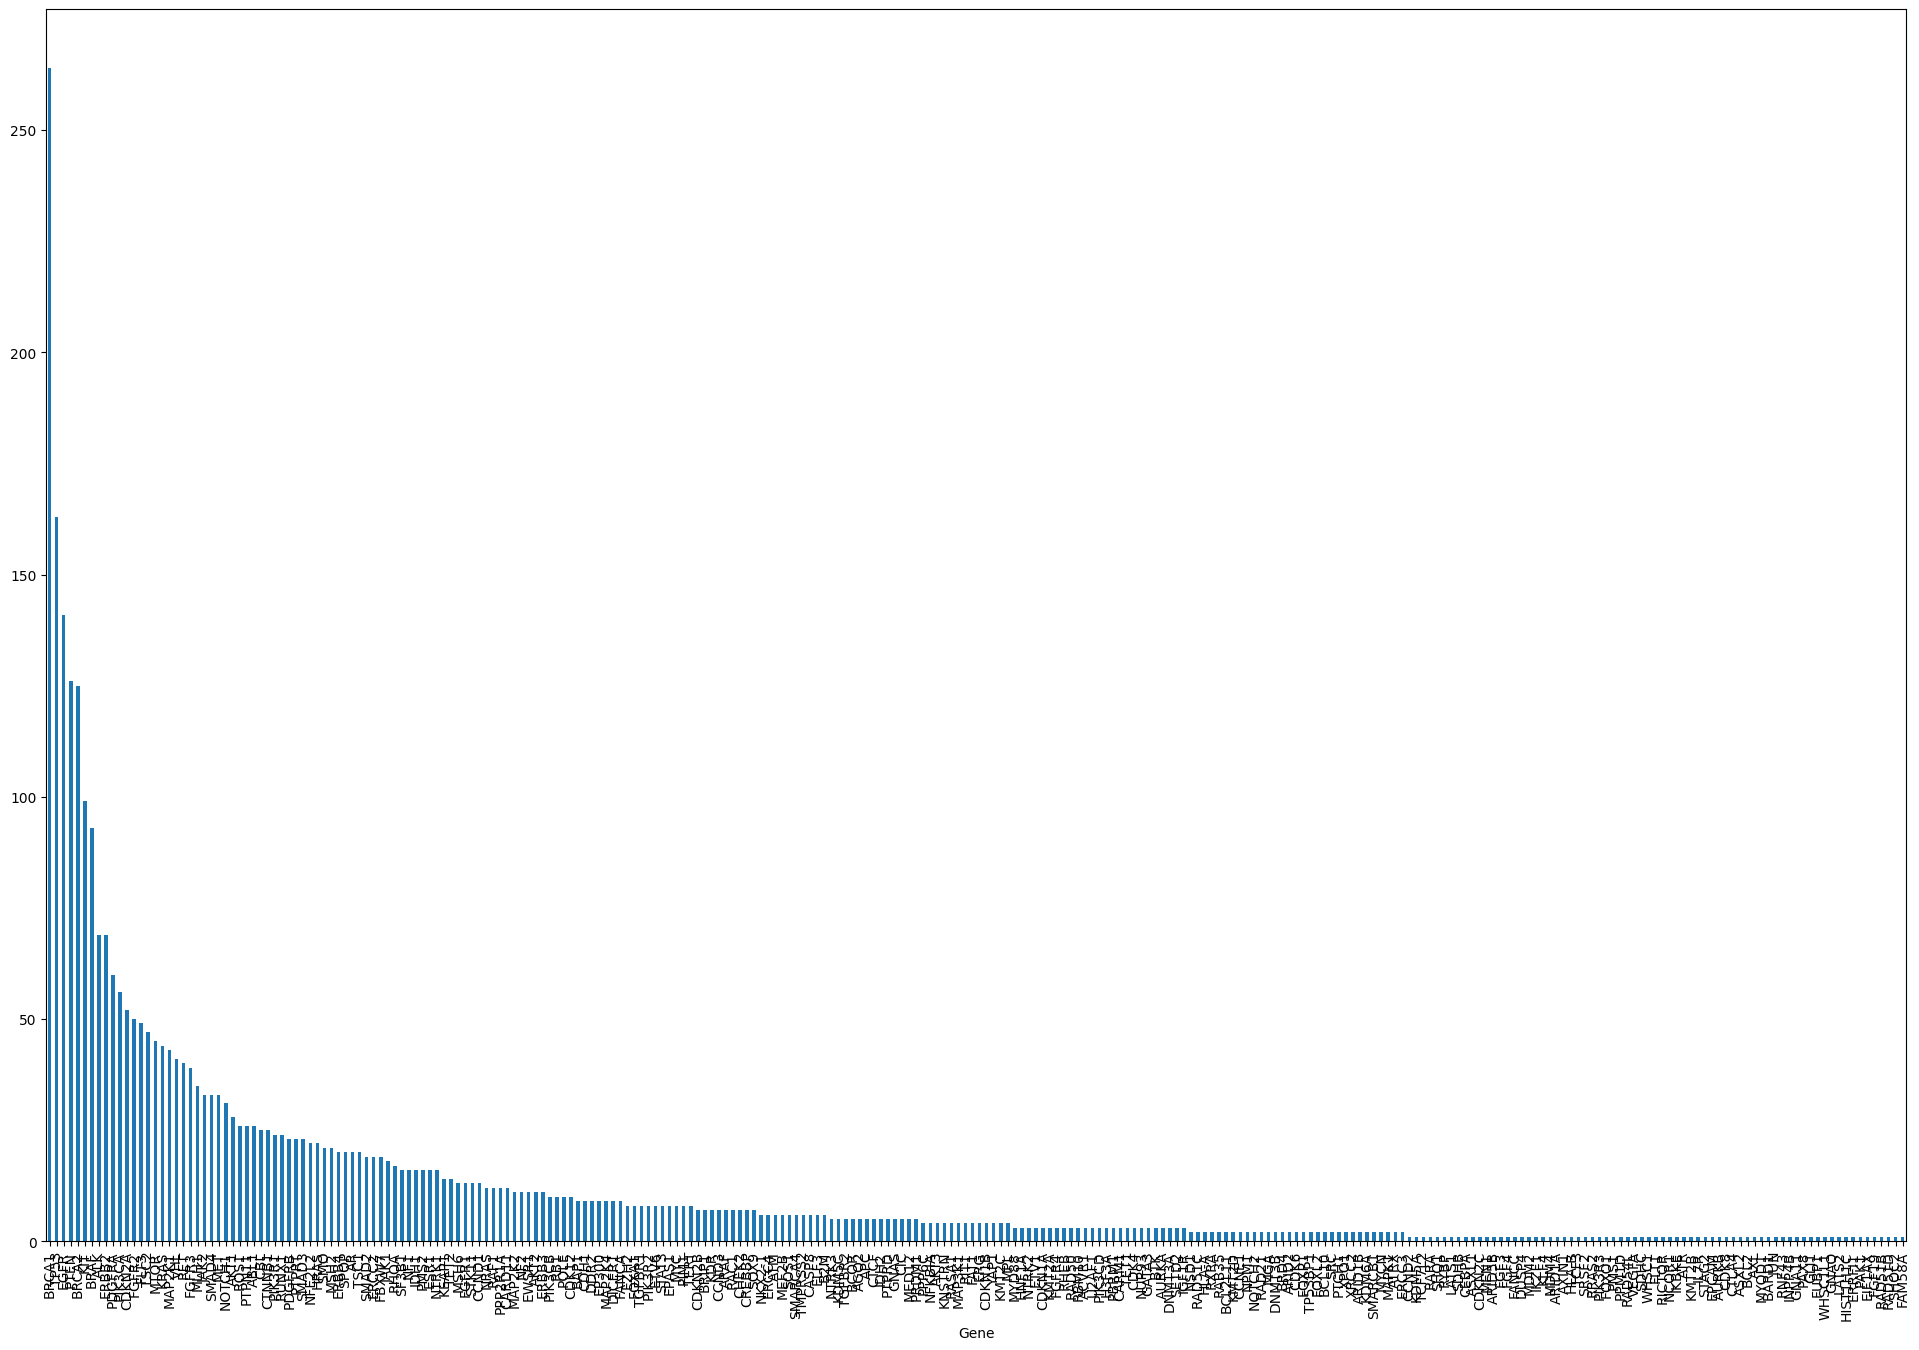

In [28]:
# Quantidade por tipos de gene:
# plt.subplot(1,3,1)
plt.figure(figsize = (24,16))
plt.xlabel("Genes")

count_values_genes_type = geral_dataset_train["Gene"].value_counts()
count_values_genes_type.plot(kind="bar")

plt.show()

pode-se ver que a quantidade está desebalanceada, remover alguns com muitos valores e alguns

In [29]:
pd.set_option('display.max_rows', None)  # Exibe todas as linhas no log
pd.set_option('display.max_columns', None)  # Exibe todas as colunas no log
def see_count_values_to_gene():
    count_values_type = geral_dataset_train["Gene"].value_counts()
    print(count_values_type)

In [30]:
see_count_values_to_gene()

Gene
BRCA1       264
TP53        163
EGFR        141
PTEN        126
BRCA2       125
KIT          99
BRAF         93
ALK          69
ERBB2        69
PDGFRA       60
PIK3CA       56
CDKN2A       52
FGFR2        50
FLT3         49
TSC2         47
MTOR         45
KRAS         44
MAP2K1       43
VHL          41
RET          40
FGFR3        39
MLH1         35
JAK2         33
SMAD4        33
MET          33
NOTCH1       31
AKT1         28
ROS1         26
PTPN11       26
ABL1         26
CBL          25
CTNNB1       25
PIK3R1       24
RUNX1        24
PDGFRB       23
PTPRT        23
SMAD3        23
NFE2L2       22
HRAS         22
SMO          21
MSH2         21
ERBB4        20
SPOP         20
AR           20
TSC1         20
SMAD2        19
ERCC2        19
FBXW7        19
JAK1         18
RHOA         17
SF3B1        16
NF1          16
IDH1         16
PMS2         16
ESR1         16
NTRK1        16
KEAP1        14
TET2         14
MSH6         13
FGFR1        13
STK11        13
CCND1        13
NRA

#### Remover Genes de Classes

In [31]:
# Antes, colocar o gráfico de genes desse tipo por classe(criar um método para ficar veirificando os outros genes)
def generate_plot_by_gene_for_classes(gene_example):
    df_gene = geral_dataset_train[geral_dataset_train["Gene"] == gene_example]

    #calcular a contagem do Gene por Classe:
    gene_por_classe = df_gene["Class"].value_counts().reset_index()
    gene_por_classe.columns = ["Class", "Count"]

    # Ordenar as classes (opcional)
    gene_por_classe = gene_por_classe.sort_values("Class")

    # Plotar o gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")

    # Configurar título e legendas
    plt.title(f"Distribuição do Gene '{gene_example}' por Classe", fontsize=16)
    plt.xlabel("Classe", fontsize=12)
    plt.ylabel("Quantidade", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)



C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


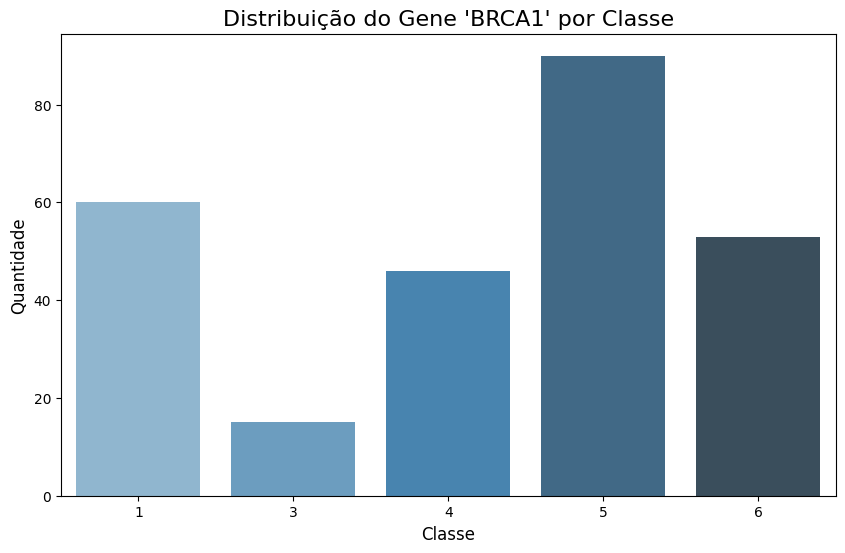

In [32]:
generate_plot_by_gene_for_classes("BRCA1")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


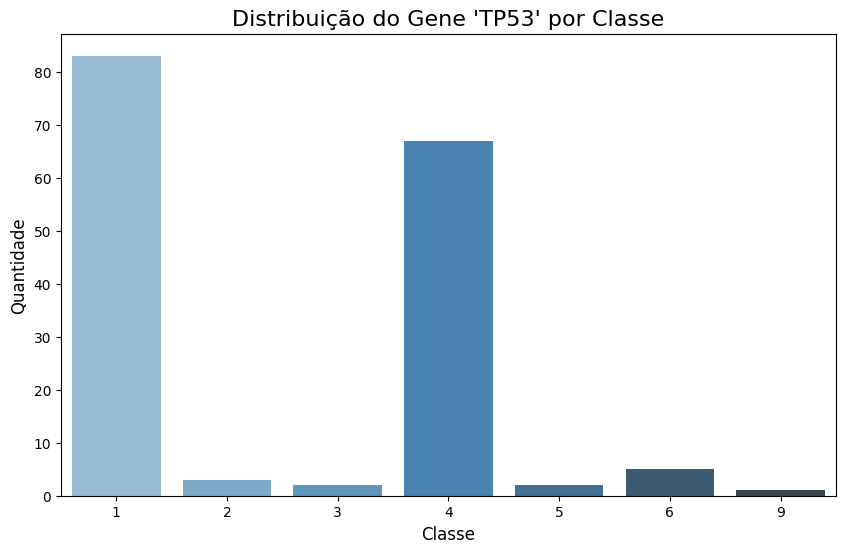

In [33]:
generate_plot_by_gene_for_classes("TP53")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


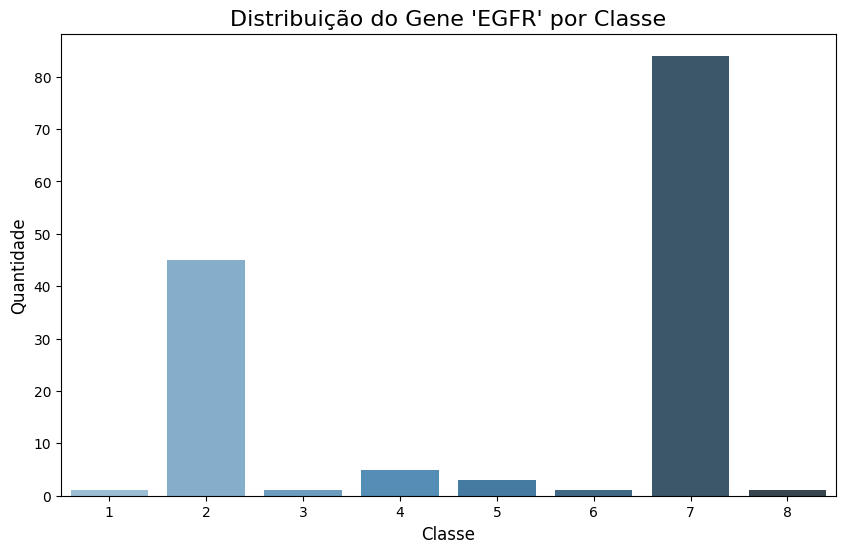

In [34]:
generate_plot_by_gene_for_classes("EGFR")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


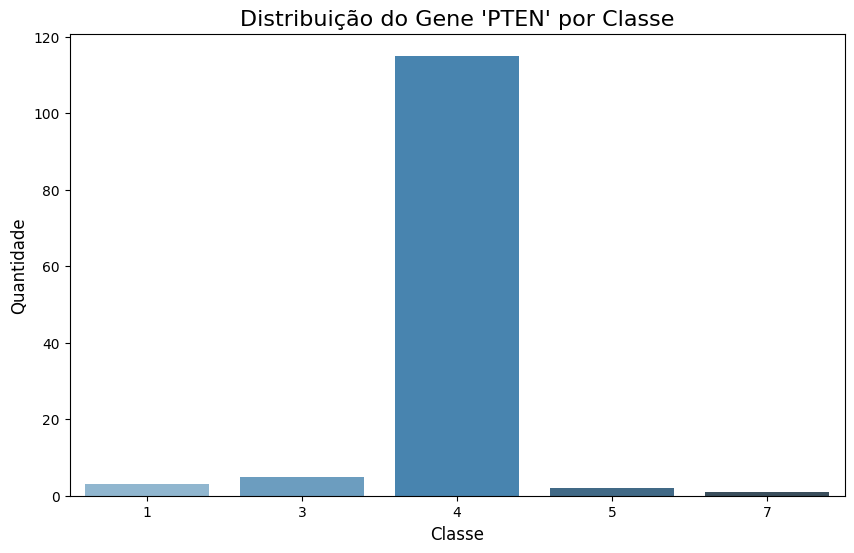

In [35]:
generate_plot_by_gene_for_classes("PTEN")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


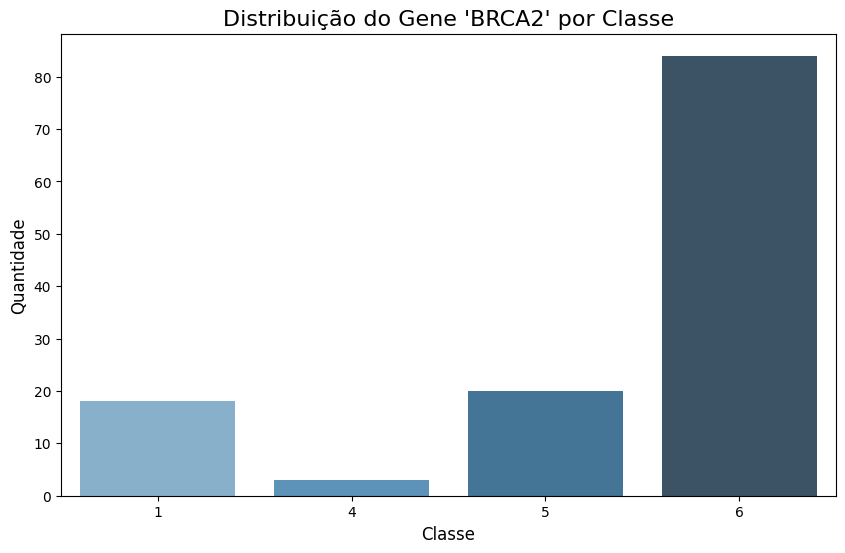

In [36]:
generate_plot_by_gene_for_classes("BRCA2")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


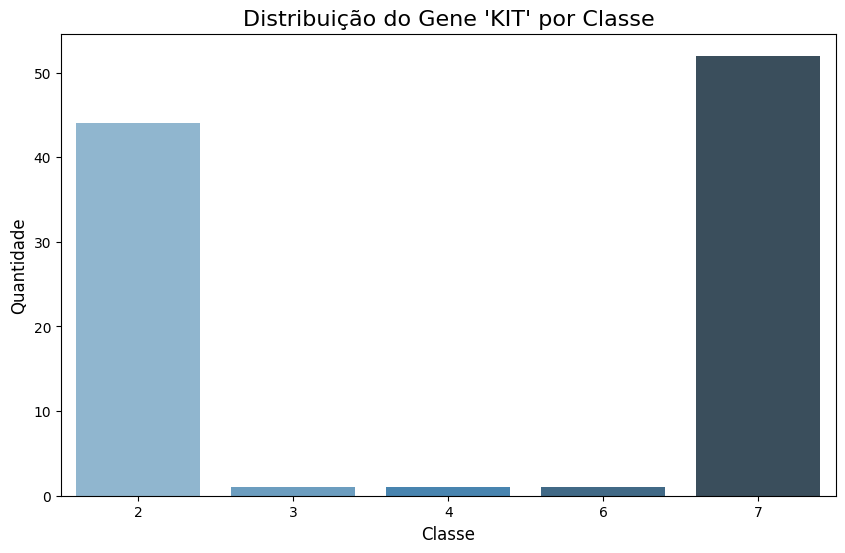

In [37]:
generate_plot_by_gene_for_classes("KIT")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


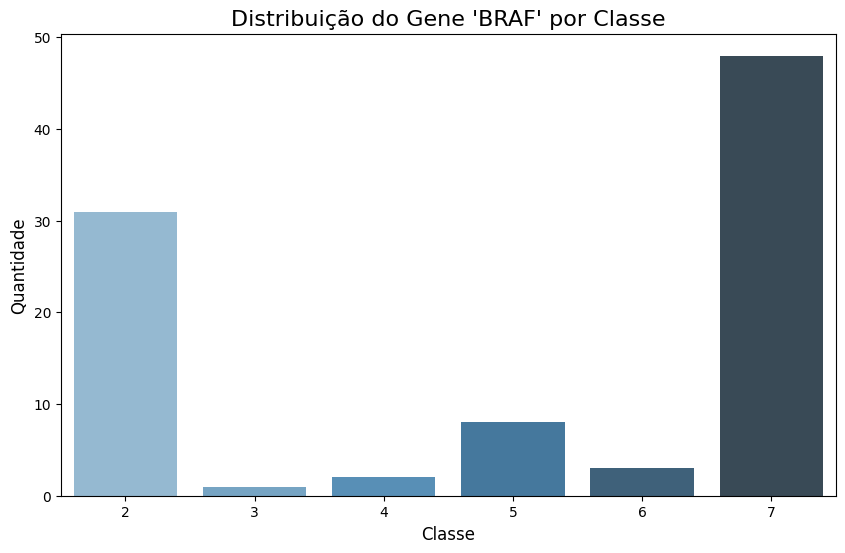

In [38]:
generate_plot_by_gene_for_classes("BRAF")

#### Remoçao de Genes por classe

In [39]:
def remove_qtd_by_class_and_gene(class_remove, gene_remove, qtd_remove):
    # Filtrar os dados das classes e genes relevantes
    filtro = geral_dataset_train[(geral_dataset_train["Class"].isin([class_remove])) & (geral_dataset_train["Gene"].isin([gene_remove]))]

    # Criar uma lista de índices para remoção
    indices_to_remove = []

    # Para cada Gene e Classe, remover a quantidade desejada
    for gene in [gene_remove]:
        for classe in [class_remove]:
            # Filtrar os dados específicos do Gene e Classe
            subset = filtro[(filtro["Gene"] == gene) & (filtro["Class"] == classe)]
        
            # Selecionar uma amostra aleatória com a quantidade desejada (se possível)
            if len(subset) >= qtd_remove:
                amostra = subset.sample(n=qtd_remove, random_state=42)
                indices_to_remove.extend(amostra.index)

    # Remover os registros do DataFrame original
    df_filtrado = geral_dataset_train.drop(indices_to_remove)

    # Mostrar os resultados
    print(f"Número de registros removidos: {len(indices_to_remove)}")
    print(f"DataFrame original: {geral_dataset_train.shape}")
    print(f"DataFrame após filtragem: {df_filtrado.shape}")

    return df_filtrado

    
    

In [40]:
geral_dataset_train = remove_qtd_by_class_and_gene(5, "BRCA1", 65)

Número de registros removidos: 65
DataFrame original: (3321, 7)
DataFrame após filtragem: (3256, 7)


In [41]:
geral_dataset_train = remove_qtd_by_class_and_gene(1, "BRCA1", 40)

Número de registros removidos: 40
DataFrame original: (3256, 7)
DataFrame após filtragem: (3216, 7)


In [42]:
geral_dataset_train = remove_qtd_by_class_and_gene(6, "BRCA1", 35)

Número de registros removidos: 35
DataFrame original: (3216, 7)
DataFrame após filtragem: (3181, 7)


In [43]:
geral_dataset_train = remove_qtd_by_class_and_gene(4, "BRCA1", 32)

Número de registros removidos: 32
DataFrame original: (3181, 7)
DataFrame após filtragem: (3149, 7)


In [44]:
geral_dataset_train = remove_qtd_by_class_and_gene(3, "BRCA1", 4)

Número de registros removidos: 4
DataFrame original: (3149, 7)
DataFrame após filtragem: (3145, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


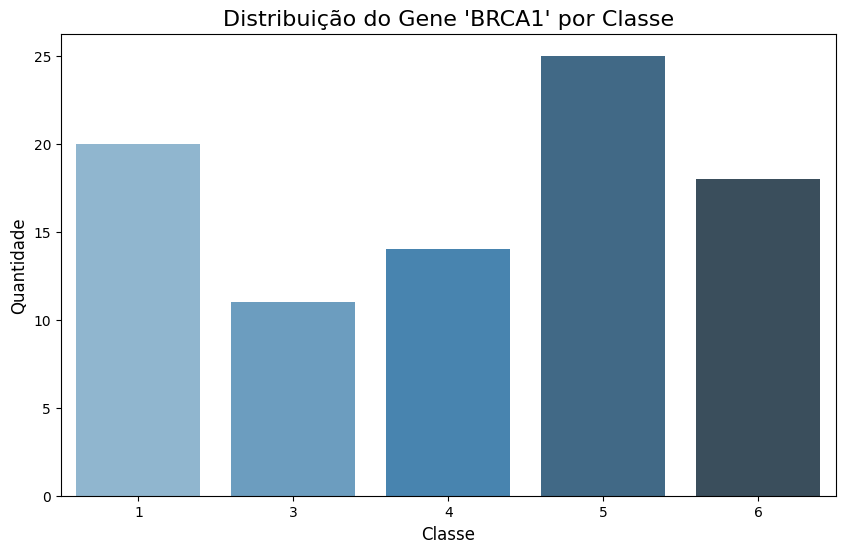

In [45]:
generate_plot_by_gene_for_classes("BRCA1")

In [46]:
geral_dataset_train = remove_qtd_by_class_and_gene(1, "TP53", 55)

Número de registros removidos: 55
DataFrame original: (3145, 7)
DataFrame após filtragem: (3090, 7)


In [47]:
geral_dataset_train = remove_qtd_by_class_and_gene(4, "TP53", 50)

Número de registros removidos: 50
DataFrame original: (3090, 7)
DataFrame após filtragem: (3040, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


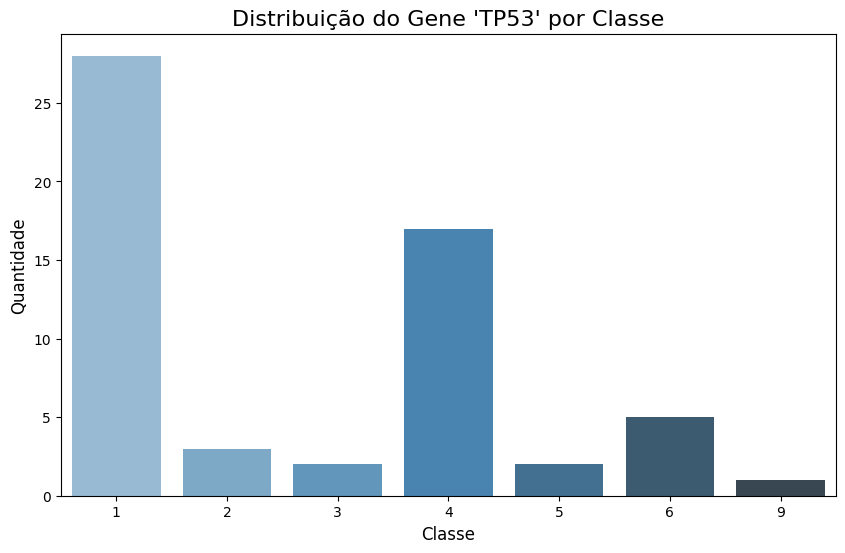

In [48]:
generate_plot_by_gene_for_classes("TP53")

In [49]:
geral_dataset_train = remove_qtd_by_class_and_gene(7, "EGFR", 70)

Número de registros removidos: 70
DataFrame original: (3040, 7)
DataFrame após filtragem: (2970, 7)


In [50]:
geral_dataset_train = remove_qtd_by_class_and_gene(2, "EGFR", 20)

Número de registros removidos: 20
DataFrame original: (2970, 7)
DataFrame após filtragem: (2950, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


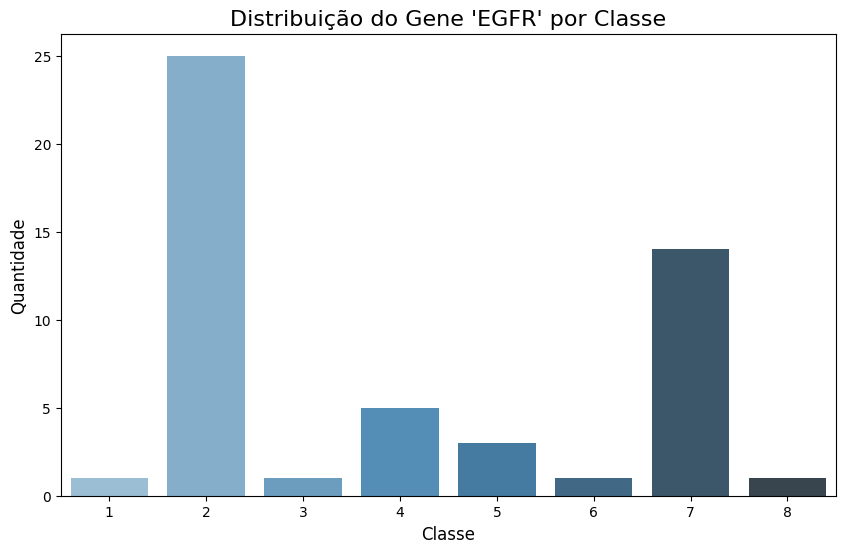

In [51]:
generate_plot_by_gene_for_classes("EGFR")

In [52]:
geral_dataset_train = remove_qtd_by_class_and_gene(4, "PTEN", 80)

Número de registros removidos: 80
DataFrame original: (2950, 7)
DataFrame após filtragem: (2870, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


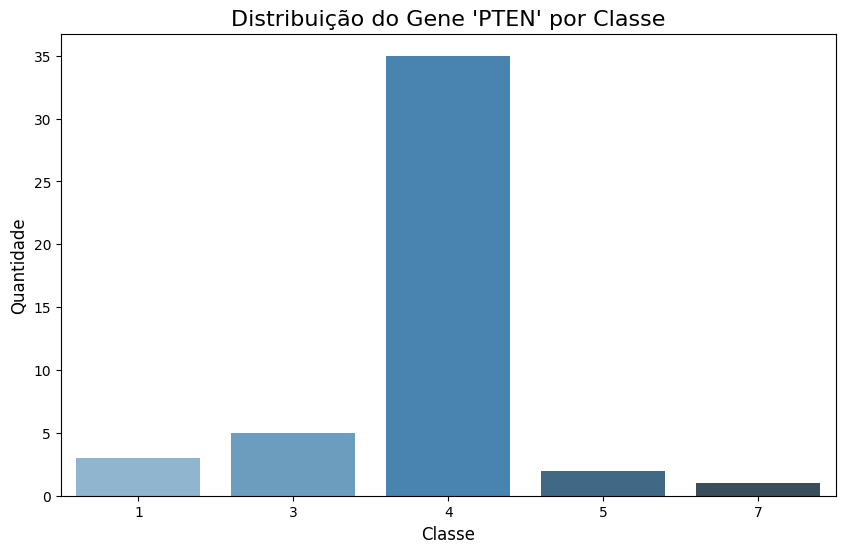

In [53]:
generate_plot_by_gene_for_classes("PTEN")

In [54]:
geral_dataset_train = remove_qtd_by_class_and_gene(6, "BRCA2", 70)

Número de registros removidos: 70
DataFrame original: (2870, 7)
DataFrame após filtragem: (2800, 7)


In [55]:
geral_dataset_train = remove_qtd_by_class_and_gene(5, "BRCA2", 6)

Número de registros removidos: 6
DataFrame original: (2800, 7)
DataFrame após filtragem: (2794, 7)


In [56]:
geral_dataset_train = remove_qtd_by_class_and_gene(1, "BRCA2", 5)

Número de registros removidos: 5
DataFrame original: (2794, 7)
DataFrame após filtragem: (2789, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


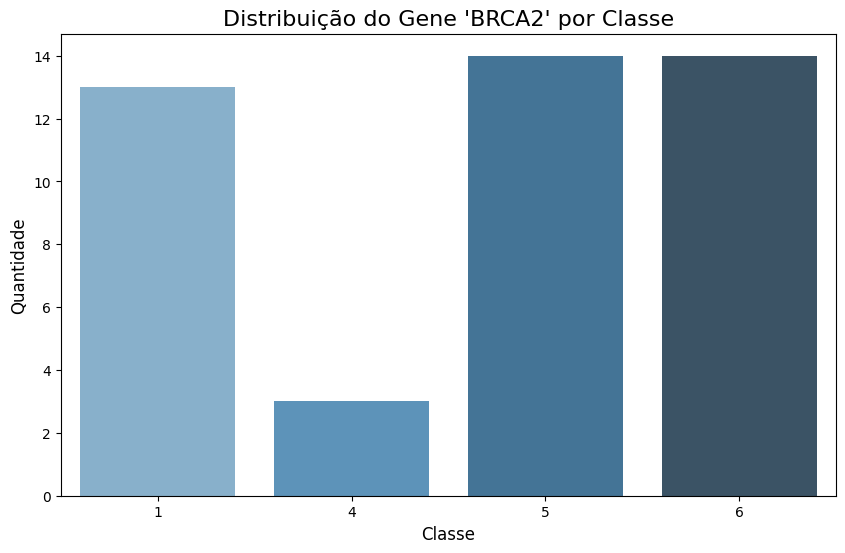

In [57]:
generate_plot_by_gene_for_classes("BRCA2")

In [58]:
geral_dataset_train = remove_qtd_by_class_and_gene(7, "KIT", 35)

Número de registros removidos: 35
DataFrame original: (2789, 7)
DataFrame após filtragem: (2754, 7)


In [59]:
geral_dataset_train = remove_qtd_by_class_and_gene(2, "KIT", 25)

Número de registros removidos: 25
DataFrame original: (2754, 7)
DataFrame após filtragem: (2729, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


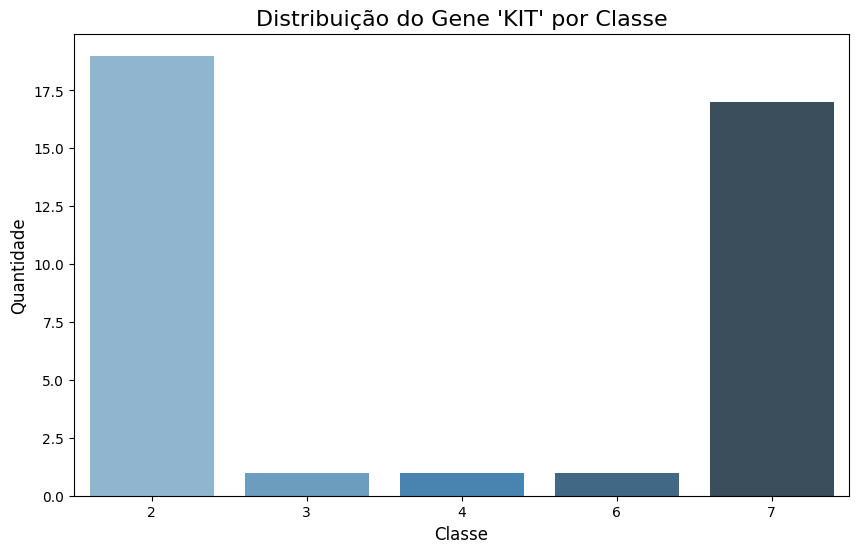

In [60]:
generate_plot_by_gene_for_classes("KIT")

In [61]:
geral_dataset_train = remove_qtd_by_class_and_gene(7, "BRAF", 35)

Número de registros removidos: 35
DataFrame original: (2729, 7)
DataFrame após filtragem: (2694, 7)


In [62]:
geral_dataset_train = remove_qtd_by_class_and_gene(2, "BRAF", 22)

Número de registros removidos: 22
DataFrame original: (2694, 7)
DataFrame após filtragem: (2672, 7)


In [63]:
geral_dataset_train = remove_qtd_by_class_and_gene(5, "BRAF", 2)

Número de registros removidos: 2
DataFrame original: (2672, 7)
DataFrame após filtragem: (2670, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\1040299421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gene_por_classe, x="Class", y="Count", palette="Blues_d")


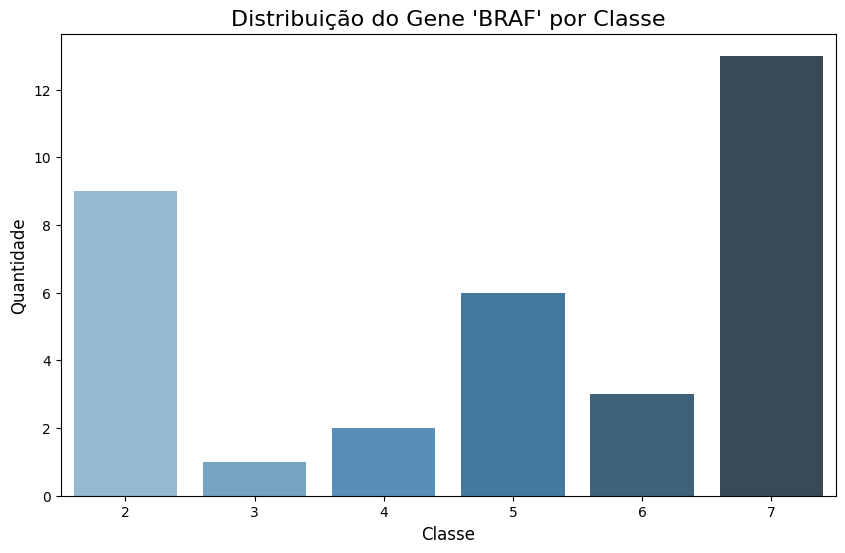

In [64]:
generate_plot_by_gene_for_classes("BRAF")

In [65]:
#remover uma certa quantidade de valores para para valores com muita frequencia em relação a Gene:
value_max_frequency_for_value_type = 7

# Contar a quantidade de ocorrências de cada valor em "Gene"
count_values_type = geral_dataset_train["Gene"].value_counts()

# Filtrar os genes com mais de 15 ocorrências
valid_genes = count_values_type[count_values_type > value_max_frequency_for_value_type].index

# Manter apenas as linhas cujo "Gene" está na lista de genes válidos
geral_dataset_train = geral_dataset_train[geral_dataset_train["Gene"].isin(valid_genes)]

In [66]:
see_count_values_to_gene()

Gene
BRCA1      88
ERBB2      69
ALK        69
PDGFRA     60
TP53       58
PIK3CA     56
CDKN2A     52
EGFR       51
FGFR2      50
FLT3       49
TSC2       47
PTEN       46
MTOR       45
KRAS       44
BRCA2      44
MAP2K1     43
VHL        41
RET        40
KIT        39
FGFR3      39
MLH1       35
BRAF       34
MET        33
SMAD4      33
JAK2       33
NOTCH1     31
AKT1       28
ABL1       26
ROS1       26
PTPN11     26
CTNNB1     25
CBL        25
PIK3R1     24
RUNX1      24
SMAD3      23
PDGFRB     23
PTPRT      23
HRAS       22
NFE2L2     22
SMO        21
MSH2       21
SPOP       20
ERBB4      20
TSC1       20
AR         20
SMAD2      19
FBXW7      19
ERCC2      19
JAK1       18
RHOA       17
PMS2       16
NTRK1      16
IDH1       16
SF3B1      16
ESR1       16
NF1        16
KEAP1      14
TET2       14
MSH6       13
CCND1      13
FGFR1      13
STK11      13
CARD11     12
PPP2R1A    12
NRAS       12
RAF1       12
EWSR1      11
ERBB3      11
MAP2K2     11
NF2        11
AKT2       11
P

In [67]:
geral_dataset_train.shape

(2222, 7)

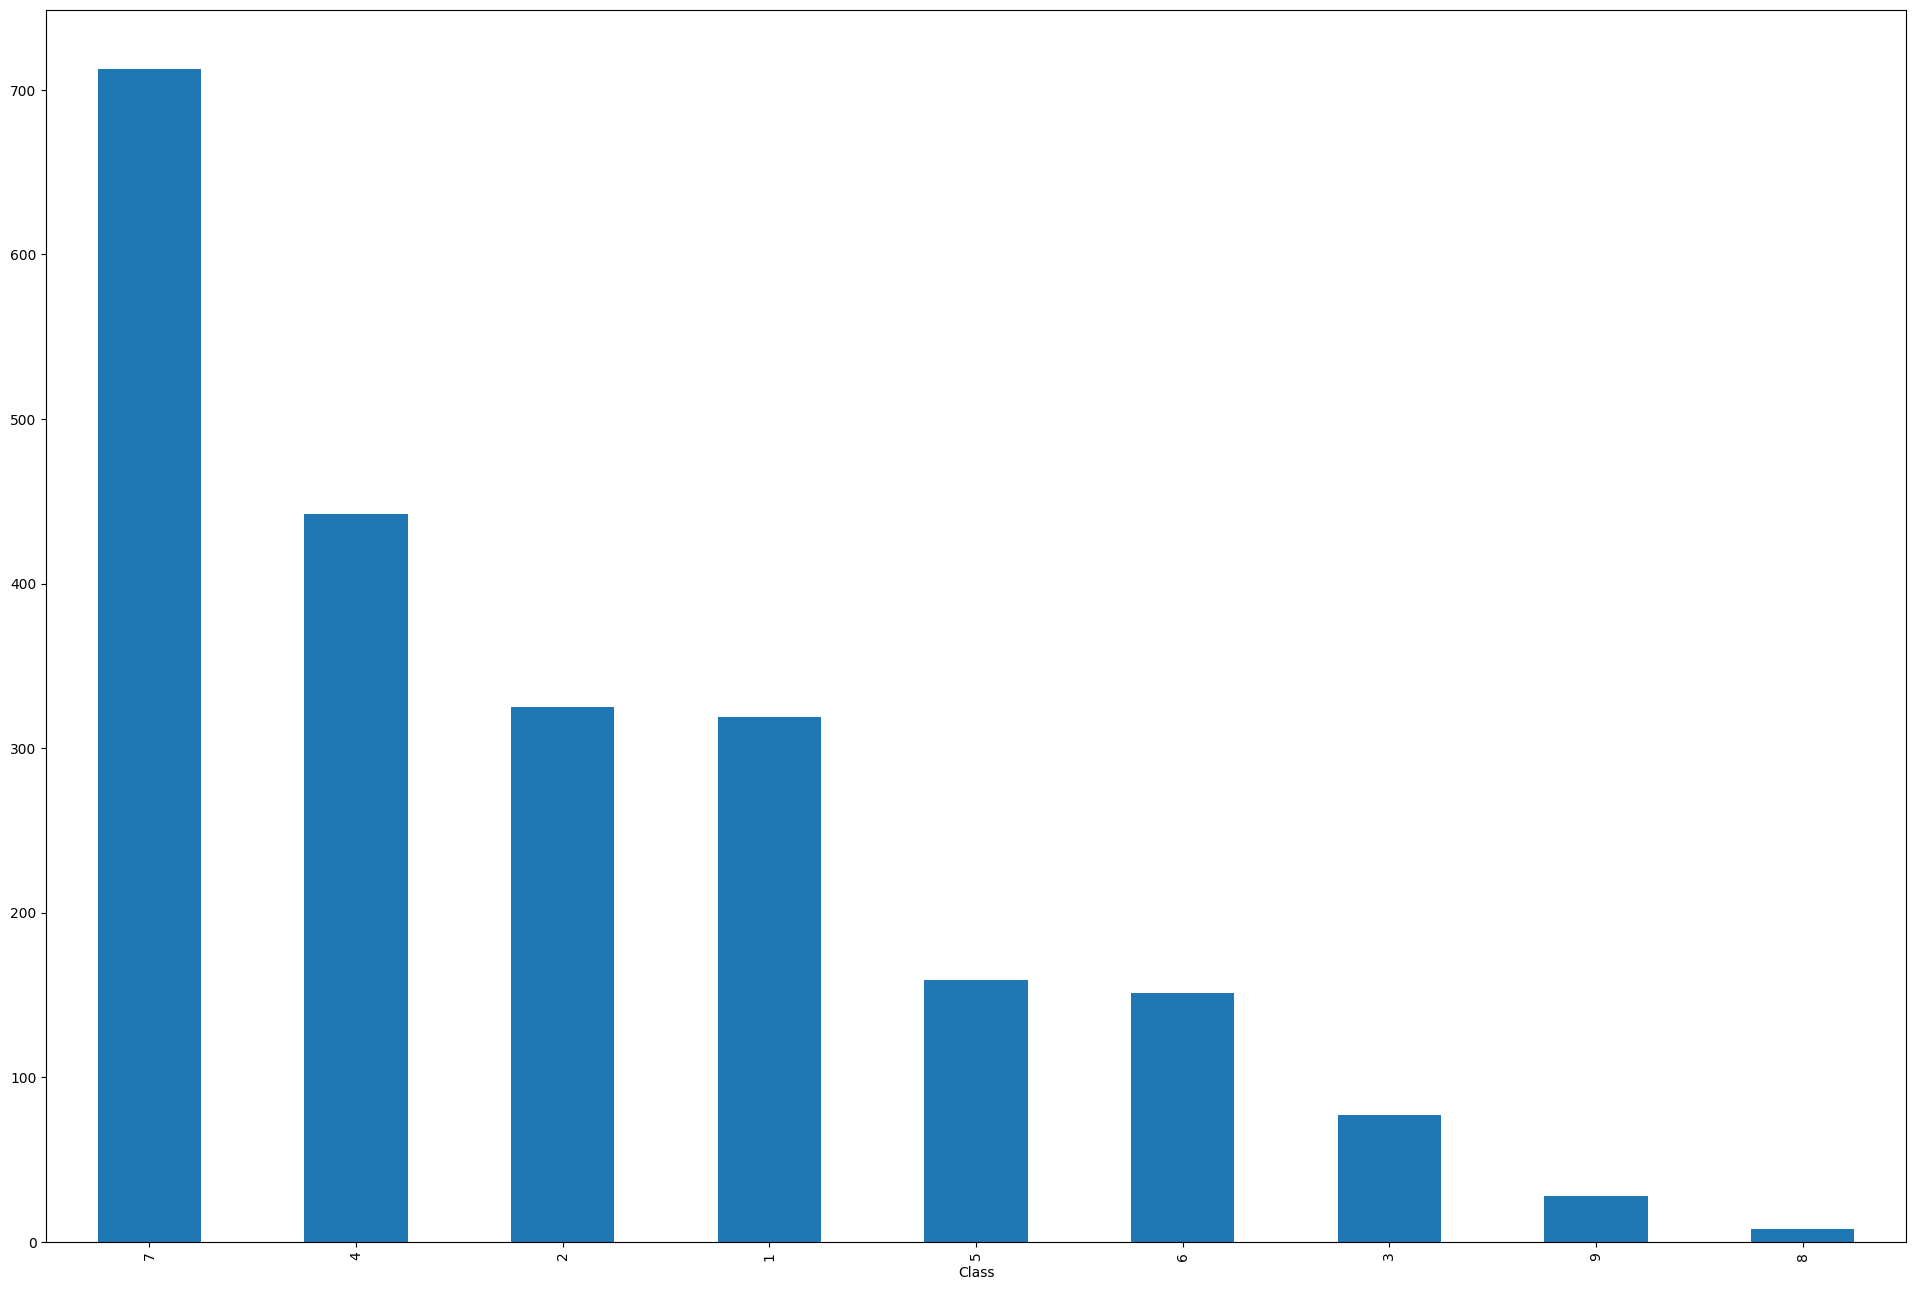

In [68]:
# Quantidade por tipos de gene:
# plt.subplot(1,3,1)
plt.figure(figsize = (24,16))
plt.xlabel("Class")

count_values_genes_type = geral_dataset_train["Class"].value_counts()
count_values_genes_type.plot(kind="bar")

plt.show()

In [69]:
#juntar subplot modificado com novo
geral_dataset_train.shape

(2222, 7)

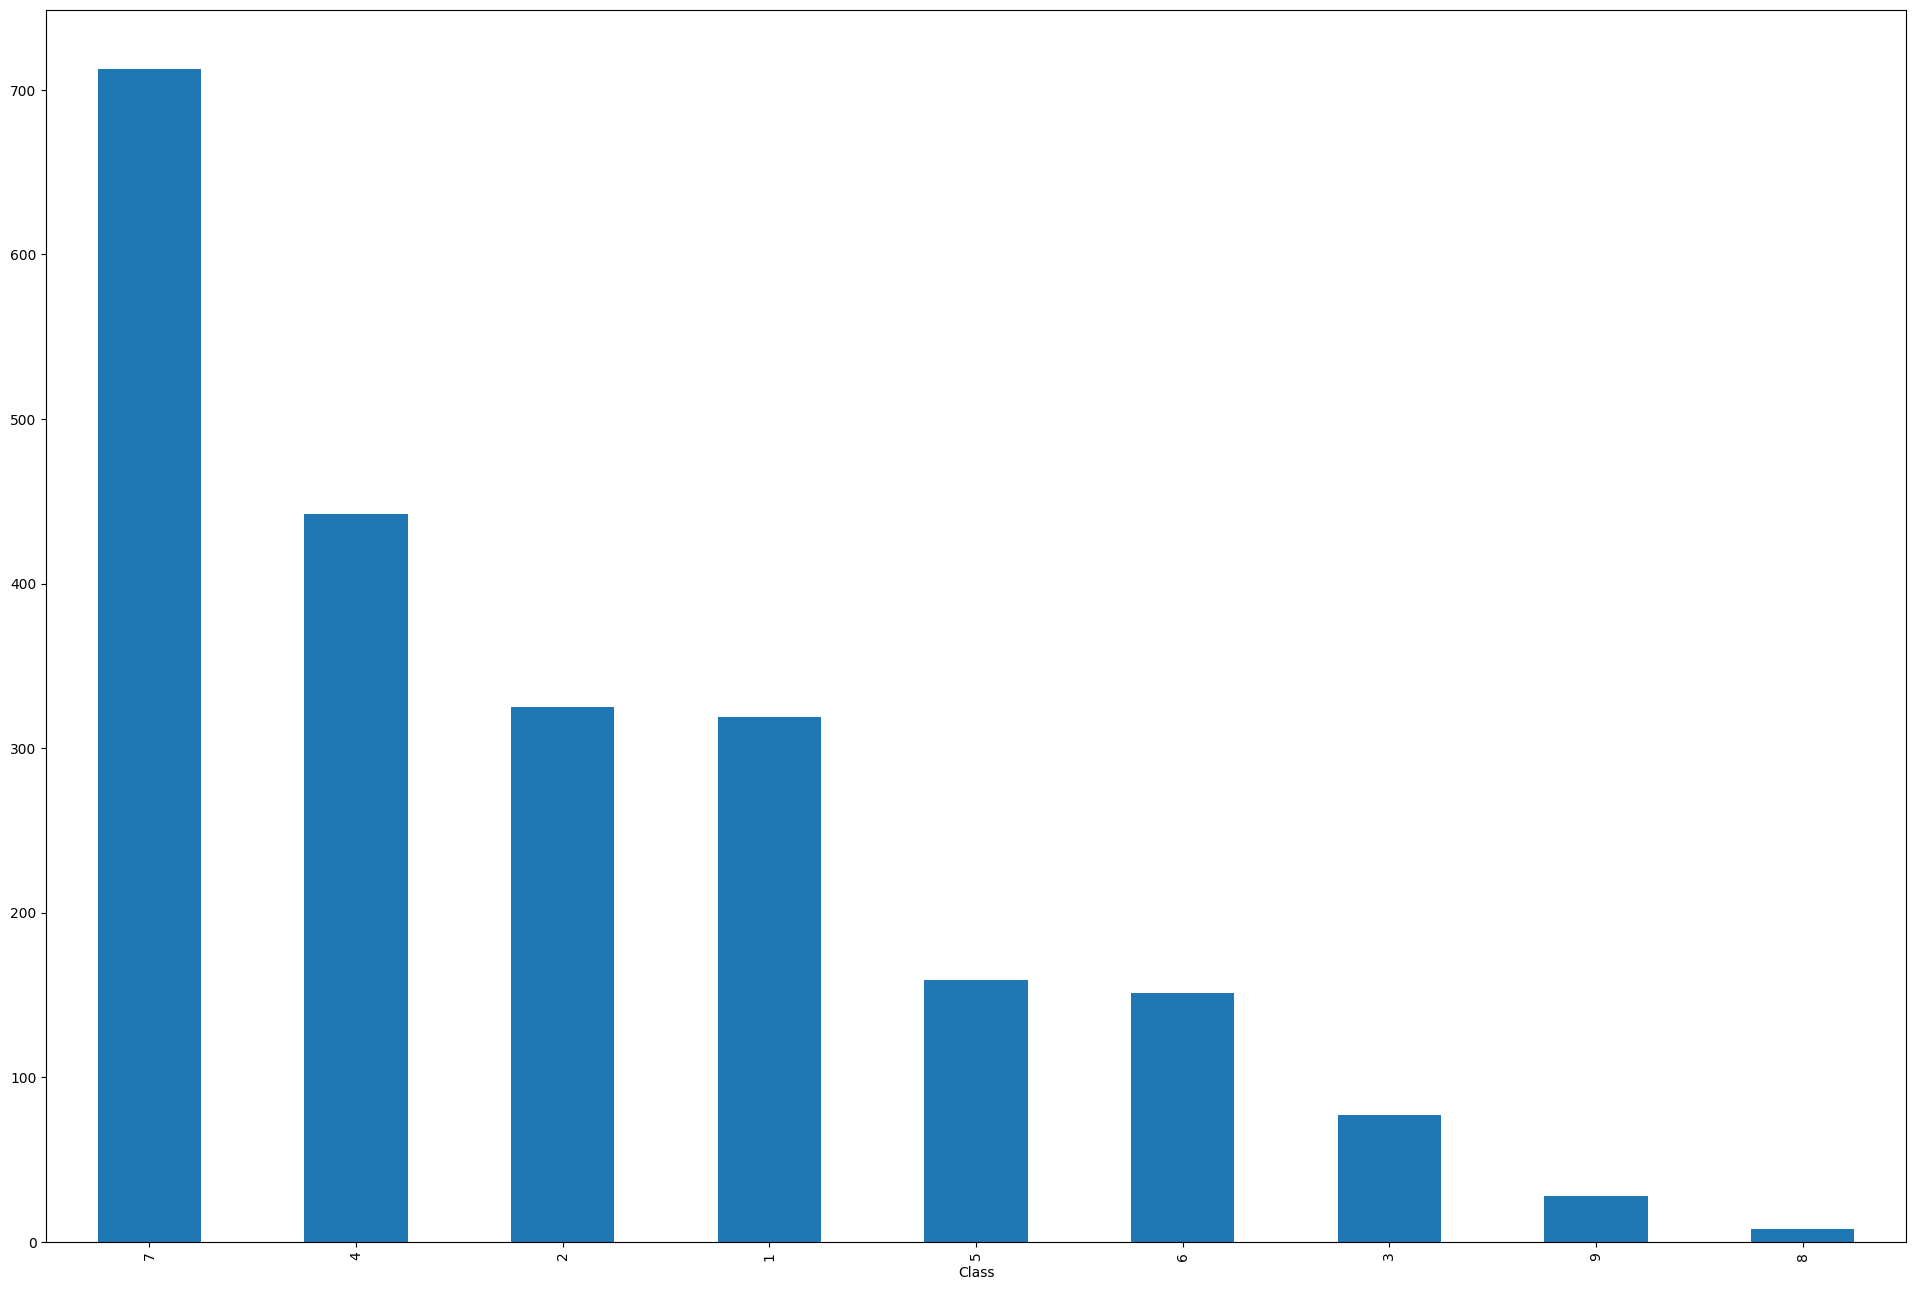

In [70]:
# Quantidade por classe novamente:
plt.figure(figsize = (24,16))
plt.xlabel("Class")

count_values_genes_type = geral_dataset_train["Class"].value_counts()
count_values_genes_type.plot(kind="bar")

plt.show()

## Análises em relação a Variation

In [71]:
def see_count_values_to_variation():
    count_values_type = geral_dataset_train["Variation"].value_counts()
    print(count_values_type)

In [72]:
see_count_values_to_variation()

Variation
Amplification                                              32
Truncating Mutations                                       26
Deletion                                                   26
Fusions                                                    21
Q61H                                                        3
Q61L                                                        3
G12V                                                        3
T58I                                                        3
Overexpression                                              3
G13D                                                        2
A146T                                                       2
E17K                                                        2
G67R                                                        2
E542K                                                       2
F384L                                                       2
G13V                                                        

muito desproporcional, pois tem vários com 1 quantidade, com 2 alguns com 3 e penas 4 tipos acima de 20

In [73]:
# Antes, colocar o gráfico de variation desse tipo por classe(criar um método para ficar veirificando as outras variation)
def generate_plot_by_variation_for_classes(variation_example):
    df_variation = geral_dataset_train[geral_dataset_train["Variation"] == variation_example]

    #calcular a contagem do Gene por Classe:
    variation_por_classe = df_variation["Class"].value_counts().reset_index()
    variation_por_classe.columns = ["Class", "Count"]

    # Ordenar as classes (opcional)
    variation_por_classe = variation_por_classe.sort_values("Class")

    # Plotar o gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")

    # Configurar título e legendas
    plt.title(f"Distribuição do Variation '{variation_example}' por Classe", fontsize=16)
    plt.xlabel("Classe", fontsize=12)
    plt.ylabel("Quantidade", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\2757954102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")


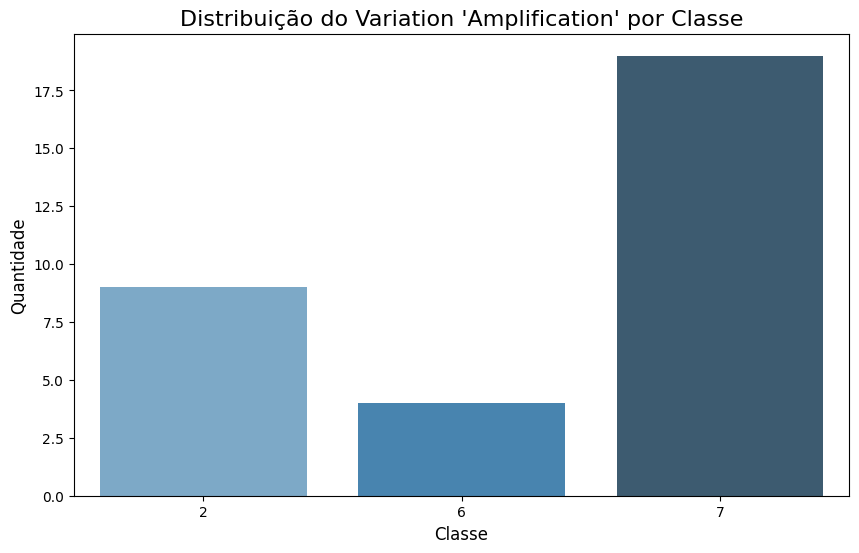

In [74]:
generate_plot_by_variation_for_classes("Amplification")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\2757954102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")


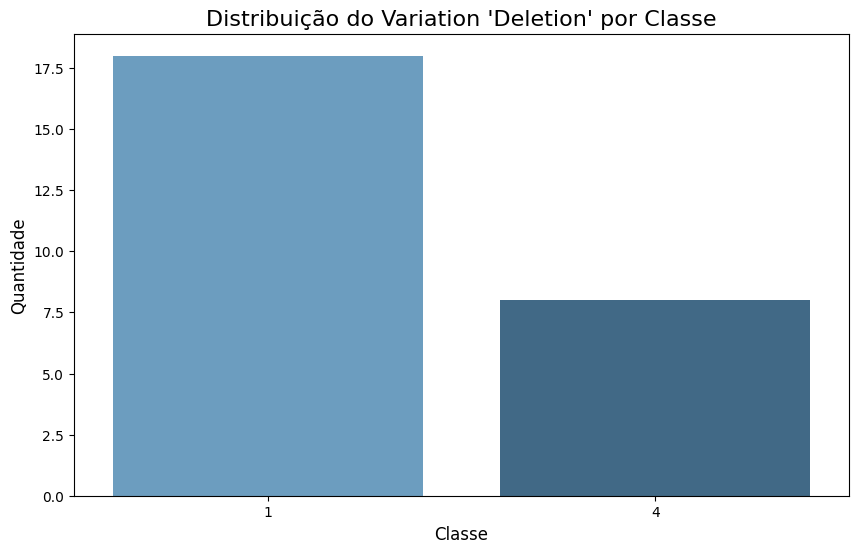

In [75]:
generate_plot_by_variation_for_classes("Deletion")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\2757954102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")


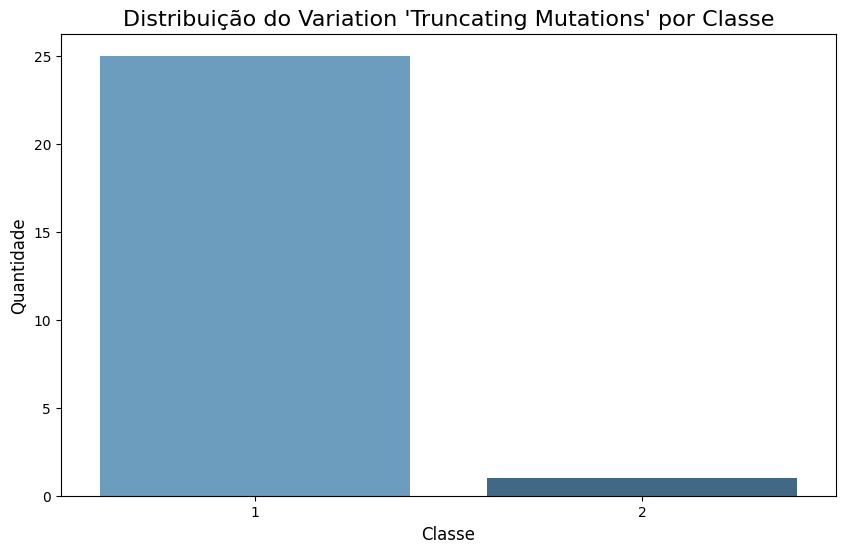

In [76]:
generate_plot_by_variation_for_classes("Truncating Mutations")

C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\2757954102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")


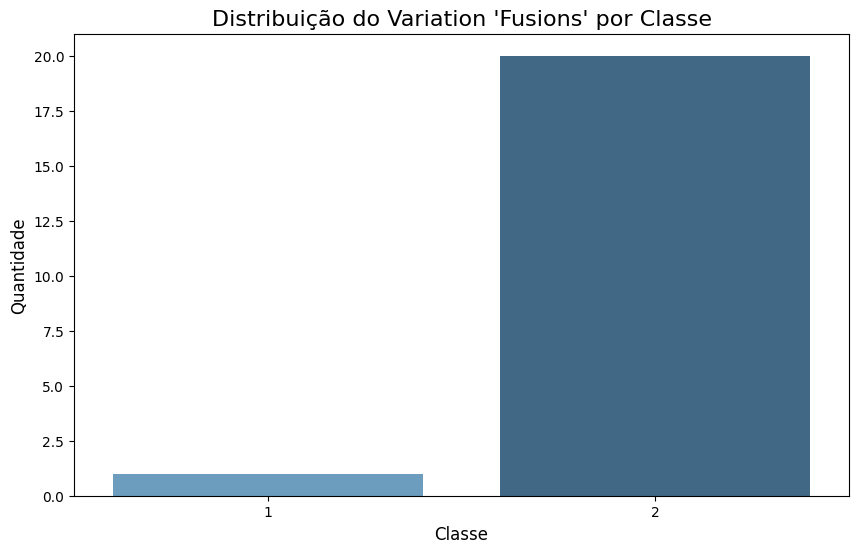

In [77]:
generate_plot_by_variation_for_classes("Fusions")

#### Remover quantidade de Variation por classes

In [78]:
def remove_qtd_by_class_and_variation(class_remove, variation_remove, qtd_remove):
    # Filtrar os dados das classes e genes relevantes
    filtro = geral_dataset_train[(geral_dataset_train["Class"].isin([class_remove])) & (geral_dataset_train["Variation"].isin([variation_remove]))]

    # Criar uma lista de índices para remoção
    indices_to_remove = []

    # Para cada Gene e Classe, remover a quantidade desejada
    for gene in [variation_remove]:
        for classe in [class_remove]:
            # Filtrar os dados específicos do Gene e Classe
            subset = filtro[(filtro["Variation"] == gene) & (filtro["Class"] == classe)]
        
            # Selecionar uma amostra aleatória com a quantidade desejada (se possível)
            if len(subset) >= qtd_remove:
                amostra = subset.sample(n=qtd_remove, random_state=42)
                indices_to_remove.extend(amostra.index)

    # Remover os registros do DataFrame original
    df_filtrado = geral_dataset_train.drop(indices_to_remove)

    # Mostrar os resultados
    print(f"Número de registros removidos: {len(indices_to_remove)}")
    print(f"DataFrame original: {geral_dataset_train.shape}")
    print(f"DataFrame após filtragem: {df_filtrado.shape}")

    return df_filtrado

In [79]:
# remover valores da Variation Amplification:
geral_dataset_train = remove_qtd_by_class_and_variation(7, "Amplification", 15)

Número de registros removidos: 15
DataFrame original: (2222, 7)
DataFrame após filtragem: (2207, 7)


In [80]:
geral_dataset_train = remove_qtd_by_class_and_variation(2, "Amplification", 7)

Número de registros removidos: 7
DataFrame original: (2207, 7)
DataFrame após filtragem: (2200, 7)


In [81]:
geral_dataset_train = remove_qtd_by_class_and_variation(6, "Amplification", 2)

Número de registros removidos: 2
DataFrame original: (2200, 7)
DataFrame após filtragem: (2198, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\2757954102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")


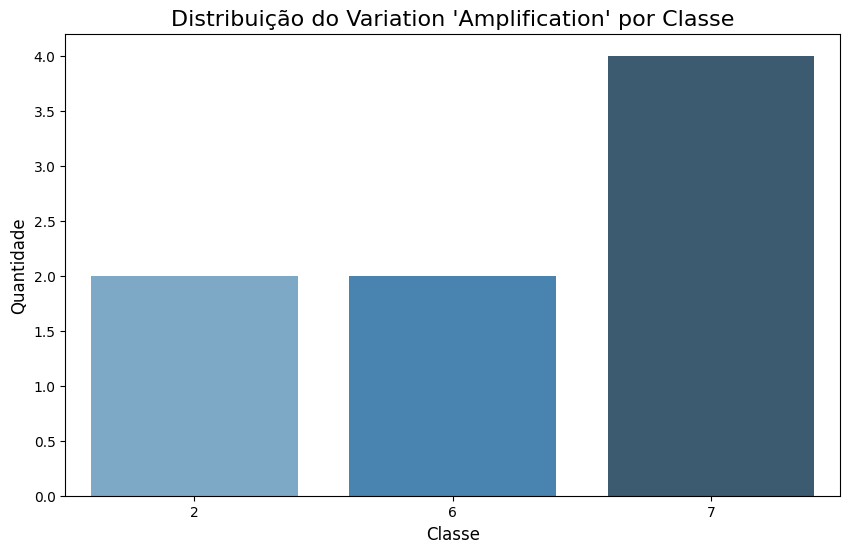

In [82]:
generate_plot_by_variation_for_classes("Amplification")

In [83]:
# remover valores da Variation Deletion:
geral_dataset_train = remove_qtd_by_class_and_variation(1, "Deletion", 14)

Número de registros removidos: 14
DataFrame original: (2198, 7)
DataFrame após filtragem: (2184, 7)


In [84]:
geral_dataset_train = remove_qtd_by_class_and_variation(4, "Deletion", 5)

Número de registros removidos: 5
DataFrame original: (2184, 7)
DataFrame após filtragem: (2179, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\2757954102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")


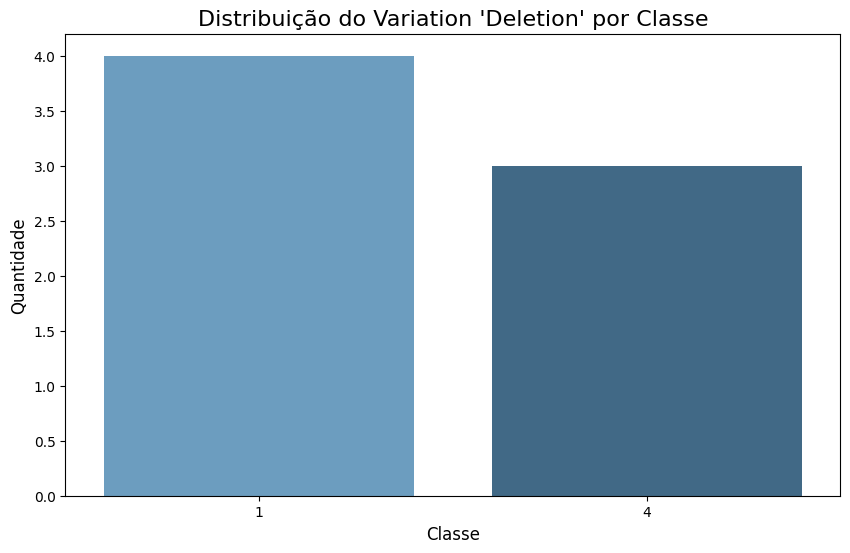

In [85]:
generate_plot_by_variation_for_classes("Deletion")

In [86]:
# remover valores da Variation Truncating Mutations:
geral_dataset_train = remove_qtd_by_class_and_variation(1, "Truncating Mutations", 18)

Número de registros removidos: 18
DataFrame original: (2179, 7)
DataFrame após filtragem: (2161, 7)


In [87]:
geral_dataset_train = remove_qtd_by_class_and_variation(4, "Truncating Mutations", 1)

Número de registros removidos: 0
DataFrame original: (2161, 7)
DataFrame após filtragem: (2161, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\2757954102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")


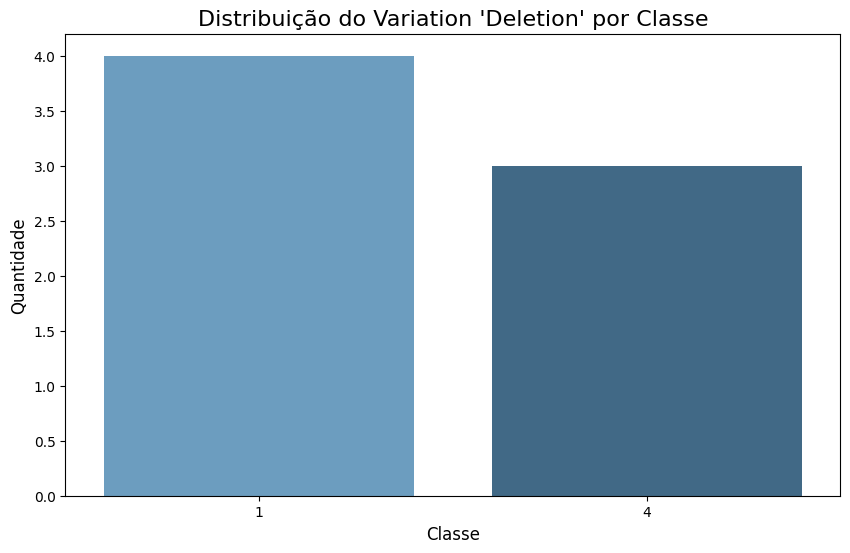

In [88]:
generate_plot_by_variation_for_classes("Deletion")

In [89]:
# remover valores da Variation Fusions:
geral_dataset_train = remove_qtd_by_class_and_variation(2, "Fusions", 15)

Número de registros removidos: 15
DataFrame original: (2161, 7)
DataFrame após filtragem: (2146, 7)


C:\Users\daniel\AppData\Local\Temp\ipykernel_29976\2757954102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variation_por_classe, x="Class", y="Count", palette="Blues_d")


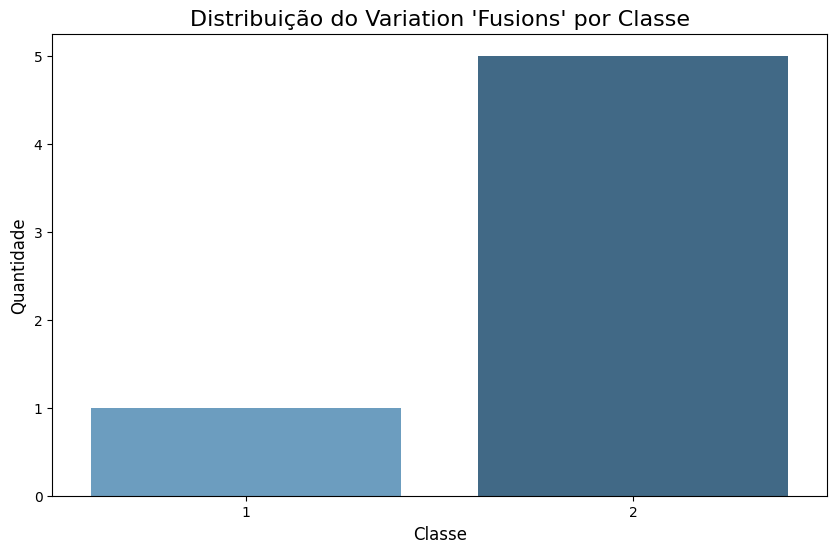

In [90]:
generate_plot_by_variation_for_classes("Fusions")

In [91]:
see_count_values_to_variation()

Variation
Truncating Mutations                                       8
Amplification                                              8
Deletion                                                   7
Fusions                                                    6
T58I                                                       3
G12V                                                       3
Q61H                                                       3
Q61L                                                       3
Overexpression                                             3
G13D                                                       2
A146T                                                      2
E17K                                                       2
F384L                                                      2
G13V                                                       2
A146V                                                      2
P130S                                                      2
Q61K          

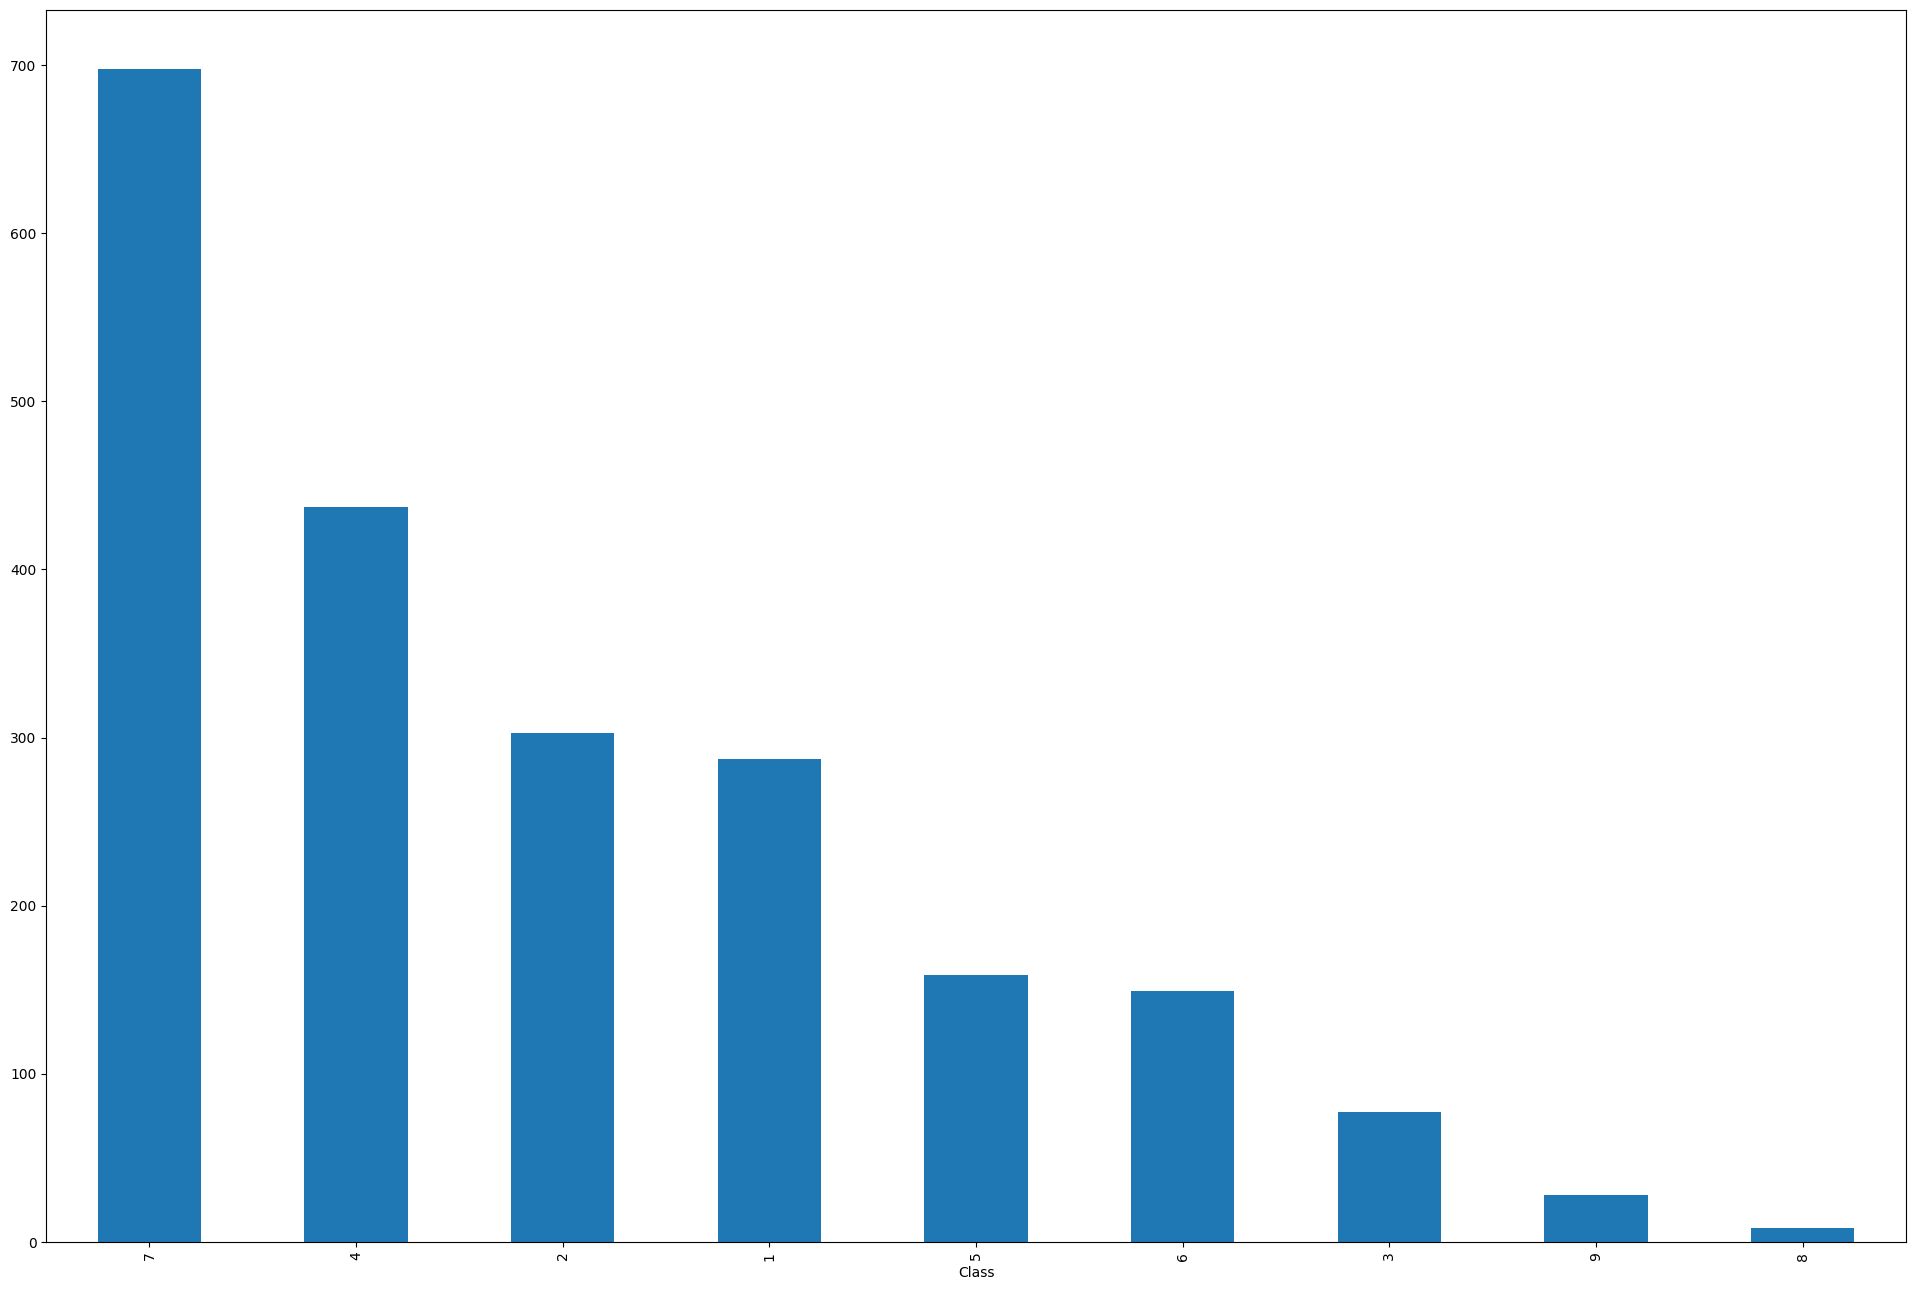

In [92]:
# Quantidade por classe novamente:
plt.figure(figsize = (24,16))
plt.xlabel("Class")

count_values_genes_type = geral_dataset_train["Class"].value_counts()
count_values_genes_type.plot(kind="bar")

plt.show()

ainda muitos da classe 4 e 7. Remover mais.

In [93]:
#remover da class 4
# qtd_to_remove = 50
# rows_with_4 = geral_dataset_train[geral_dataset_train["Class"] == 4]
# rows_to_remove = rows_with_4.sample(n=qtd_to_remove, random_state=42)
# geral_dataset_train =geral_dataset_train.drop(rows_to_remove.index)

In [94]:
#remover da class 7
# qtd_to_remove = 100
# rows_with_1 = geral_dataset_train[geral_dataset_train["Class"] == 7]
# rows_to_remove = rows_with_1.sample(n=qtd_to_remove, random_state=42)
# geral_dataset_train =geral_dataset_train.drop(rows_to_remove.index)

In [95]:
geral_dataset_train.shape

(2146, 7)

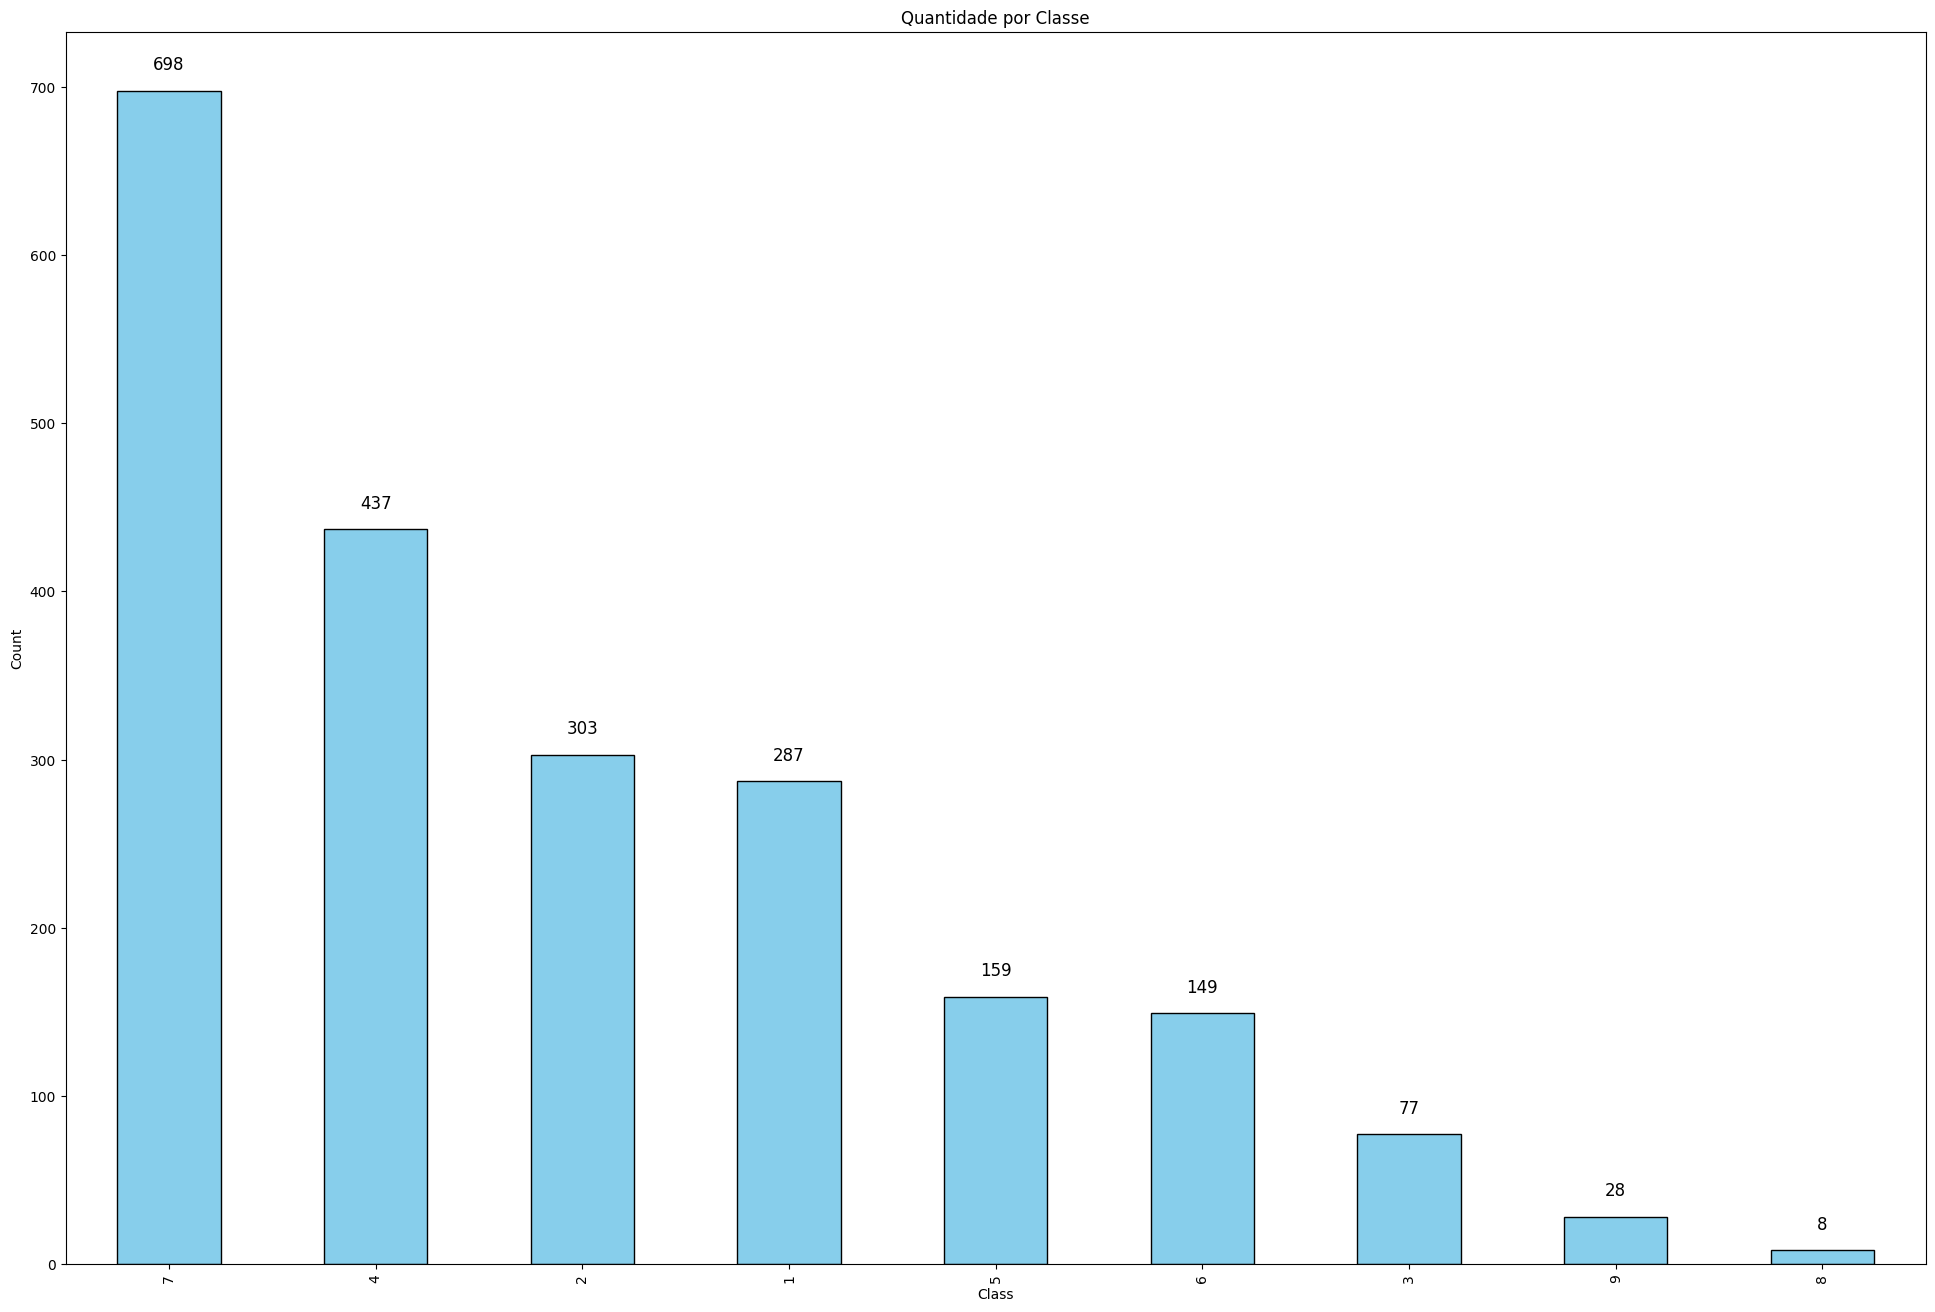

In [96]:
# Quantidade por classe novamente:
import matplotlib.pyplot as plt

# Quantidade por classe
plt.figure(figsize=(24, 16))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Quantidade por Classe")

# Contagem dos valores
count_values_genes_type = geral_dataset_train["Class"].value_counts()

# Plotar gráfico de barras
ax = count_values_genes_type.plot(kind="bar", color="skyblue", edgecolor="black")

# Adicionar rótulos (valores) nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posição X
        p.get_height() + 10,  # Posição Y (um pouco acima da barra)
        int(p.get_height()),  # Valor do rótulo
        ha="center",  # Centralizar horizontalmente
        va="bottom",  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

plt.show()

### Tokenizar a coluna Text para terr valores numéricos

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

primeiro, remover as stop words:


In [98]:
stop_words = set(stopwords.words("english"))

def remove_stop_word(text):
    words = word_tokenize(text.lower())
    words_filtered = [word for word in words if word not in stop_words]
    return ' '.join(words_filtered)

geral_dataset_train["TextCleaned"] = geral_dataset_train["Text"].apply(remove_stop_word)


limpar melhor a coluna Text:

depois das StopWords removidas, vectorizar/tokenizar os textos e deixar em um array(em uma coluna):

In [99]:
# remover caracteres especiais:
geral_dataset_train['TextCleaned'] = geral_dataset_train['TextCleaned'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

In [100]:
# remover tokens que é somente número:
def remove_numeric_tokens(text):
    # Divide o texto em tokens e filtra aqueles que não são apenas números
    tokens = text.split()
    filtered_tokens = [token for token in tokens if not token.isdigit()]
    return ' '.join(filtered_tokens)

geral_dataset_train['TextCleaned'] = geral_dataset_train['TextCleaned'].apply(remove_numeric_tokens)

In [101]:
geral_dataset_train.shape

(2146, 8)

In [102]:
geral_dataset_train.head(5)

ID Gene Variation  Class  \
1   1  CBL     W802*      2   
2   2  CBL     Q249E      2   
3   3  CBL     N454D      3   
4   4  CBL     L399V      4   
5   5  CBL     V391I      4   

                                                Text  GeneId  VariationId  \
1   Abstract Background  Non-small cell lung canc...       1            1   
2   Abstract Background  Non-small cell lung canc...       1            2   
3  Recent evidence has demonstrated that acquired...       1            3   
4  Oncogenic mutations in the monomeric Casitas B...       1            4   
5  Oncogenic mutations in the monomeric Casitas B...       1            5   

                                         TextCleaned  
1  abstract background nonsmall cell lung cancer ...  
2  abstract background nonsmall cell lung cancer ...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas blineage...  
5  oncogenic mutations monomeric casitas blineage...

#### remover tokens com comprimento excessivo:

In [103]:
# Excluir tokens com comprimento maior que 13
geral_dataset_train['TextCleaned'] = geral_dataset_train['TextCleaned'].apply(
    lambda text: ' '.join([token for token in text.split() if len(token) <= 10])
)
geral_dataset_train.head(5)

ID Gene Variation  Class  \
1   1  CBL     W802*      2   
2   2  CBL     Q249E      2   
3   3  CBL     N454D      3   
4   4  CBL     L399V      4   
5   5  CBL     V391I      4   

                                                Text  GeneId  VariationId  \
1   Abstract Background  Non-small cell lung canc...       1            1   
2   Abstract Background  Non-small cell lung canc...       1            2   
3  Recent evidence has demonstrated that acquired...       1            3   
4  Oncogenic mutations in the monomeric Casitas B...       1            4   
5  Oncogenic mutations in the monomeric Casitas B...       1            5   

                                         TextCleaned  
1  abstract background nonsmall cell lung cancer ...  
2  abstract background nonsmall cell lung cancer ...  
3  recent evidence acquired disomy aupd novel mec...  
4  oncogenic mutations monomeric casitas blineage...  
5  oncogenic mutations monomeric casitas blineage...

#### remover tokens com muitos número misturados:

In [104]:
import re

# Remover tokens com mais de 50% de números
geral_dataset_train['TextCleaned'] = geral_dataset_train['TextCleaned'].apply(
    lambda text: ' '.join([token for token in text.split() if not re.match(r'^\d*[a-zA-Z]+\d+$', token)])
)
geral_dataset_train.head(5)

ID Gene Variation  Class  \
1   1  CBL     W802*      2   
2   2  CBL     Q249E      2   
3   3  CBL     N454D      3   
4   4  CBL     L399V      4   
5   5  CBL     V391I      4   

                                                Text  GeneId  VariationId  \
1   Abstract Background  Non-small cell lung canc...       1            1   
2   Abstract Background  Non-small cell lung canc...       1            2   
3  Recent evidence has demonstrated that acquired...       1            3   
4  Oncogenic mutations in the monomeric Casitas B...       1            4   
5  Oncogenic mutations in the monomeric Casitas B...       1            5   

                                         TextCleaned  
1  abstract background nonsmall cell lung cancer ...  
2  abstract background nonsmall cell lung cancer ...  
3  recent evidence acquired disomy aupd novel mec...  
4  oncogenic mutations monomeric casitas blineage...  
5  oncogenic mutations monomeric casitas blineage...

#### remover tokens com frequencia muito baixa:

In [105]:
from collections import Counter

qtd_min_frquencia = 300

# Contar a frequência dos tokens
all_tokens = [token for text in geral_dataset_train['TextCleaned'] for token in text.split()]
token_counts = Counter(all_tokens)

# Filtrar tokens com frequência >= 300
geral_dataset_train['TextCleaned'] = geral_dataset_train['TextCleaned'].apply(
    lambda text: ' '.join([token for token in text.split() if token_counts[token] >= qtd_min_frquencia])
)

geral_dataset_train.shape

(2146, 8)

In [106]:
geral_dataset_train.head(5)

ID Gene Variation  Class  \
1   1  CBL     W802*      2   
2   2  CBL     Q249E      2   
3   3  CBL     N454D      3   
4   4  CBL     L399V      4   
5   5  CBL     V391I      4   

                                                Text  GeneId  VariationId  \
1   Abstract Background  Non-small cell lung canc...       1            1   
2   Abstract Background  Non-small cell lung canc...       1            2   
3  Recent evidence has demonstrated that acquired...       1            3   
4  Oncogenic mutations in the monomeric Casitas B...       1            4   
5  Oncogenic mutations in the monomeric Casitas B...       1            5   

                                         TextCleaned  
1  cell lung cancer group number genetic ccbl imp...  
2  cell lung cancer group number genetic ccbl imp...  
3  evidence mutations cancer may reduced mutation...  
4  mutations cbl gene found many tumors several h...  
5  mutations cbl gene found many tumors several h...

#### aplicar lemmatization:

In [107]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Certifique-se de baixar os recursos necessários do NLTK
nltk.download("punkt")
nltk.download("wordnet")

# Inicializar o lemmatizer
lemmatizer = WordNetLemmatizer()

# Aplicar lemmatization diretamente ao texto puro
geral_dataset_train['TextCleaned'] = geral_dataset_train['TextCleaned'].apply(
    lambda text: " ".join(lemmatizer.lemmatize(word) for word in word_tokenize(text))
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### aplicar stemming:

In [108]:
from nltk.stem import PorterStemmer

nltk.download("punkt")

stemmer = PorterStemmer()

# Aplicar stemming diretamente ao texto puro
geral_dataset_train['TextCleaned'] = geral_dataset_train['TextCleaned'].apply(
    lambda text: " ".join(stemmer.stem(word) for word in word_tokenize(text))
)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### colunas de tokens:

In [109]:
geral_dataset_train["tokens"] = geral_dataset_train["TextCleaned"].apply(lambda x : x.split())
mlb = MultiLabelBinarizer()
one_hot_tokens = mlb.fit_transform(geral_dataset_train["tokens"])

df_one_hot_tokens = pd.DataFrame(one_hot_tokens, columns=mlb.classes_)
geral_dataset_train = pd.concat([geral_dataset_train, df_one_hot_tokens], axis=1)

In [110]:
geral_dataset_train.shape

(2721, 227)

In [111]:
#geral_dataset_train.isnull().sum()

In [112]:
geral_dataset_train.dropna(inplace=True)

In [113]:
#geral_dataset_train.isnull().sum()

In [114]:
geral_dataset_train.shape

(1571, 227)

In [115]:
geral_dataset_train.head(5)

ID Gene Variation  Class  \
1  1.0  CBL     W802*    2.0   
2  2.0  CBL     Q249E    2.0   
3  3.0  CBL     N454D    3.0   
4  4.0  CBL     L399V    4.0   
5  5.0  CBL     V391I    4.0   

                                                Text  GeneId  VariationId  \
1   Abstract Background  Non-small cell lung canc...     1.0          1.0   
2   Abstract Background  Non-small cell lung canc...     1.0          2.0   
3  Recent evidence has demonstrated that acquired...     1.0          3.0   
4  Oncogenic mutations in the monomeric Casitas B...     1.0          4.0   
5  Oncogenic mutations in the monomeric Casitas B...     1.0          5.0   

                                         TextCleaned  \
1  cell lung cancer group number genet ccbl impor...   
2  cell lung cancer group number genet ccbl impor...   
3  evid mutat cancer may reduc mutat perform sing...   
4  mutat cbl gene found mani tumor sever human cc...   
5  mutat cbl gene found mani tumor sever human cc...   

                                              tokens   6a  aberr  accord  \
1  [cell, lung, cancer, group, number, genet, ccb...  0.0    0.0     1.0   
2  [cell, lung, cancer, group, number, genet, ccb...  0.0    1.0     1.0   
3  [evid, mutat, cancer, may, reduc, mutat, perfo...  0.0    0.0     1.0   
4  [mutat, cbl, gene, found, mani, tumor, sever, ...  0.0    0.0     1.0   
5  [mutat, cbl, gene, found, mani, tumor, sever, ...  0.0    0.0     1.0   

   activ  addit  adhes  affect   ag  age   al  allel  also  although  amino  \
1    1.0    1.0    0.0     1.0  1.0  1.0  1.0    1.0   1.0       1.0    0.0   
2    1.0    1.0    0.0     1.0  0.0  1.0  0.0    1.0   1.0       1.0    1.0   
3    1.0    1.0    0.0     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0   
4    1.0    1.0    0.0     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0   
5    1.0    1.0    0.0     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0   

   among  analysi  analyz  assay  associ  avail    b  base  bind   bp  breast  \
1    1.0      1.0     1.0    1.0     1.0    0.0  1.0   1.0   1.0  0.0     1.0   
2    0.0      1.0     1.0    1.0     1.0    1.0  1.0   1.0   1.0  0.0     0.0   
3    1.0      1.0     1.0    1.0     1.0    1.0  1.0   1.0   1.0  0.0     0.0   
4    1.0      1.0     1.0    1.0     1.0    1.0  1.0   1.0   1.0  0.0     0.0   
5    1.0      1.0     1.0    1.0     1.0    1.0  1.0   1.0   1.0  0.0     0.0   

     c  cancer  canon  case  cbl  ccbl  cell  cellcel  chang  class  clinic  \
1  1.0     1.0    0.0   0.0  1.0   1.0   1.0      0.0    1.0    1.0     0.0   
2  1.0     1.0    0.0   1.0  1.0   0.0   1.0      0.0    1.0    0.0     1.0   
3  1.0     1.0    0.0   1.0  1.0   1.0   1.0      0.0    1.0    1.0     0.0   
4  1.0     1.0    0.0   1.0  1.0   1.0   1.0      0.0    1.0    1.0     0.0   
5  1.0     1.0    0.0   1.0  1.0   1.0   1.0      0.0    1.0    1.0     0.0   

   colorect  common  compar  complex  construct  control  could  cryptic  \
1       0.0     0.0     1.0      0.0        1.0      1.0    1.0      0.0   
2       0.0     1.0     1.0      1.0        1.0      1.0    1.0      0.0   
3       0.0     0.0     1.0      1.0        1.0      1.0    1.0      0.0   
4       0.0     0.0     1.0      1.0        1.0      1.0    1.0      0.0   
5       0.0     0.0     1.0      1.0        1.0      1.0    1.0      0.0   

   cycl  damag  data  describ  detect  determin  differ  diseas  dna  domain  \
1   1.0    0.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   
2   0.0    0.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   
3   1.0    1.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   
4   1.0    1.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   
5   1.0    1.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   

   due  effect  egfr  either  energi   et  event  evid  exon  express  factor  \
1  1.0     1.0   1.0     1.0     0.0  1.0    0.0   1.0   1.0      1.0     1.0   
2  1.0     1.0   

In [116]:

# deletar colunass que começa com letra, tem conjunto de numero e depois termina com uma letra
# columns_to_drop = [col for col in geral_dataset_train.columns if re.match(r'^[a-zA-Z]+\d+[a-zA-Z]+$', col)]
# geral_dataset_train = geral_dataset_train.drop(columns=columns_to_drop)


# deletar colunas com apenas 1, 2 ou 3 caracteres
# Identificar colunas com nomes de 1 a 3 caracteres
# columns_to_drop_less_value = [col for col in geral_dataset_train.columns if len(col) <= 1]
# geral_dataset_train = geral_dataset_train.drop(columns=columns_to_drop_less_value)


In [117]:
geral_dataset_train.shape

(1571, 227)

In [118]:
geral_dataset_train.head(5)

ID Gene Variation  Class  \
1  1.0  CBL     W802*    2.0   
2  2.0  CBL     Q249E    2.0   
3  3.0  CBL     N454D    3.0   
4  4.0  CBL     L399V    4.0   
5  5.0  CBL     V391I    4.0   

                                                Text  GeneId  VariationId  \
1   Abstract Background  Non-small cell lung canc...     1.0          1.0   
2   Abstract Background  Non-small cell lung canc...     1.0          2.0   
3  Recent evidence has demonstrated that acquired...     1.0          3.0   
4  Oncogenic mutations in the monomeric Casitas B...     1.0          4.0   
5  Oncogenic mutations in the monomeric Casitas B...     1.0          5.0   

                                         TextCleaned  \
1  cell lung cancer group number genet ccbl impor...   
2  cell lung cancer group number genet ccbl impor...   
3  evid mutat cancer may reduc mutat perform sing...   
4  mutat cbl gene found mani tumor sever human cc...   
5  mutat cbl gene found mani tumor sever human cc...   

                                              tokens   6a  aberr  accord  \
1  [cell, lung, cancer, group, number, genet, ccb...  0.0    0.0     1.0   
2  [cell, lung, cancer, group, number, genet, ccb...  0.0    1.0     1.0   
3  [evid, mutat, cancer, may, reduc, mutat, perfo...  0.0    0.0     1.0   
4  [mutat, cbl, gene, found, mani, tumor, sever, ...  0.0    0.0     1.0   
5  [mutat, cbl, gene, found, mani, tumor, sever, ...  0.0    0.0     1.0   

   activ  addit  adhes  affect   ag  age   al  allel  also  although  amino  \
1    1.0    1.0    0.0     1.0  1.0  1.0  1.0    1.0   1.0       1.0    0.0   
2    1.0    1.0    0.0     1.0  0.0  1.0  0.0    1.0   1.0       1.0    1.0   
3    1.0    1.0    0.0     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0   
4    1.0    1.0    0.0     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0   
5    1.0    1.0    0.0     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0   

   among  analysi  analyz  assay  associ  avail    b  base  bind   bp  breast  \
1    1.0      1.0     1.0    1.0     1.0    0.0  1.0   1.0   1.0  0.0     1.0   
2    0.0      1.0     1.0    1.0     1.0    1.0  1.0   1.0   1.0  0.0     0.0   
3    1.0      1.0     1.0    1.0     1.0    1.0  1.0   1.0   1.0  0.0     0.0   
4    1.0      1.0     1.0    1.0     1.0    1.0  1.0   1.0   1.0  0.0     0.0   
5    1.0      1.0     1.0    1.0     1.0    1.0  1.0   1.0   1.0  0.0     0.0   

     c  cancer  canon  case  cbl  ccbl  cell  cellcel  chang  class  clinic  \
1  1.0     1.0    0.0   0.0  1.0   1.0   1.0      0.0    1.0    1.0     0.0   
2  1.0     1.0    0.0   1.0  1.0   0.0   1.0      0.0    1.0    0.0     1.0   
3  1.0     1.0    0.0   1.0  1.0   1.0   1.0      0.0    1.0    1.0     0.0   
4  1.0     1.0    0.0   1.0  1.0   1.0   1.0      0.0    1.0    1.0     0.0   
5  1.0     1.0    0.0   1.0  1.0   1.0   1.0      0.0    1.0    1.0     0.0   

   colorect  common  compar  complex  construct  control  could  cryptic  \
1       0.0     0.0     1.0      0.0        1.0      1.0    1.0      0.0   
2       0.0     1.0     1.0      1.0        1.0      1.0    1.0      0.0   
3       0.0     0.0     1.0      1.0        1.0      1.0    1.0      0.0   
4       0.0     0.0     1.0      1.0        1.0      1.0    1.0      0.0   
5       0.0     0.0     1.0      1.0        1.0      1.0    1.0      0.0   

   cycl  damag  data  describ  detect  determin  differ  diseas  dna  domain  \
1   1.0    0.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   
2   0.0    0.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   
3   1.0    1.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   
4   1.0    1.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   
5   1.0    1.0   1.0      1.0     1.0       1.0     1.0     1.0  1.0     1.0   

   due  effect  egfr  either  energi   et  event  evid  exon  express  factor  \
1  1.0     1.0   1.0     1.0     0.0  1.0    0.0   1.0   1.0      1.0     1.0   
2  1.0     1.0   

#### SMOTE para as classes do tipo 1, 2, 3, 5, 6, 8, 9:

In [119]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
# Criar um novo DataFrame contendo apenas as colunas numéricas para poder usar no SMOTE
numerical_dataset = geral_dataset_train.select_dtypes(include=["number"])

# Exibir as primeiras linhas do novo DataFrame
print(numerical_dataset.head())


    ID  Class  GeneId  VariationId   6a  aberr  accord  activ  addit  adhes  \
1  1.0    2.0     1.0          1.0  0.0    0.0     1.0    1.0    1.0    0.0   
2  2.0    2.0     1.0          2.0  0.0    1.0     1.0    1.0    1.0    0.0   
3  3.0    3.0     1.0          3.0  0.0    0.0     1.0    1.0    1.0    0.0   
4  4.0    4.0     1.0          4.0  0.0    0.0     1.0    1.0    1.0    0.0   
5  5.0    4.0     1.0          5.0  0.0    0.0     1.0    1.0    1.0    0.0   

   affect   ag  age   al  allel  also  although  amino  among  analysi  \
1     1.0  1.0  1.0  1.0    1.0   1.0       1.0    0.0    1.0      1.0   
2     1.0  0.0  1.0  0.0    1.0   1.0       1.0    1.0    0.0      1.0   
3     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0    1.0      1.0   
4     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0    1.0      1.0   
5     1.0  1.0  0.0  0.0    1.0   1.0       1.0    1.0    1.0      1.0   

   analyz  assay  associ  avail    b  base  bind   bp  breast    c  cancer  \
1 

In [121]:
# resolvendo probleiminha da classe 3 e 8 que só tem uma linha:
# Filtrar as linhas cujo valor de 'Class' é 3 ou 8
# rows_to_duplicate = numerical_dataset[numerical_dataset["Class"].isin([3, 8])]

# # Duplicar as linhas e adicioná-las ao DataFrame original
# numerical_dataset = pd.concat([numerical_dataset, rows_to_duplicate], ignore_index=True)
# numerical_dataset = pd.concat([numerical_dataset, rows_to_duplicate], ignore_index=True)

# # Exibir as novas quantidades por classe
# print(numerical_dataset["Class"].value_counts())

In [122]:
# numerical_dataset = pd.concat([numerical_dataset, rows_to_duplicate], ignore_index=True)

# # Exibir as novas quantidades por classe
# print(numerical_dataset["Class"].value_counts())

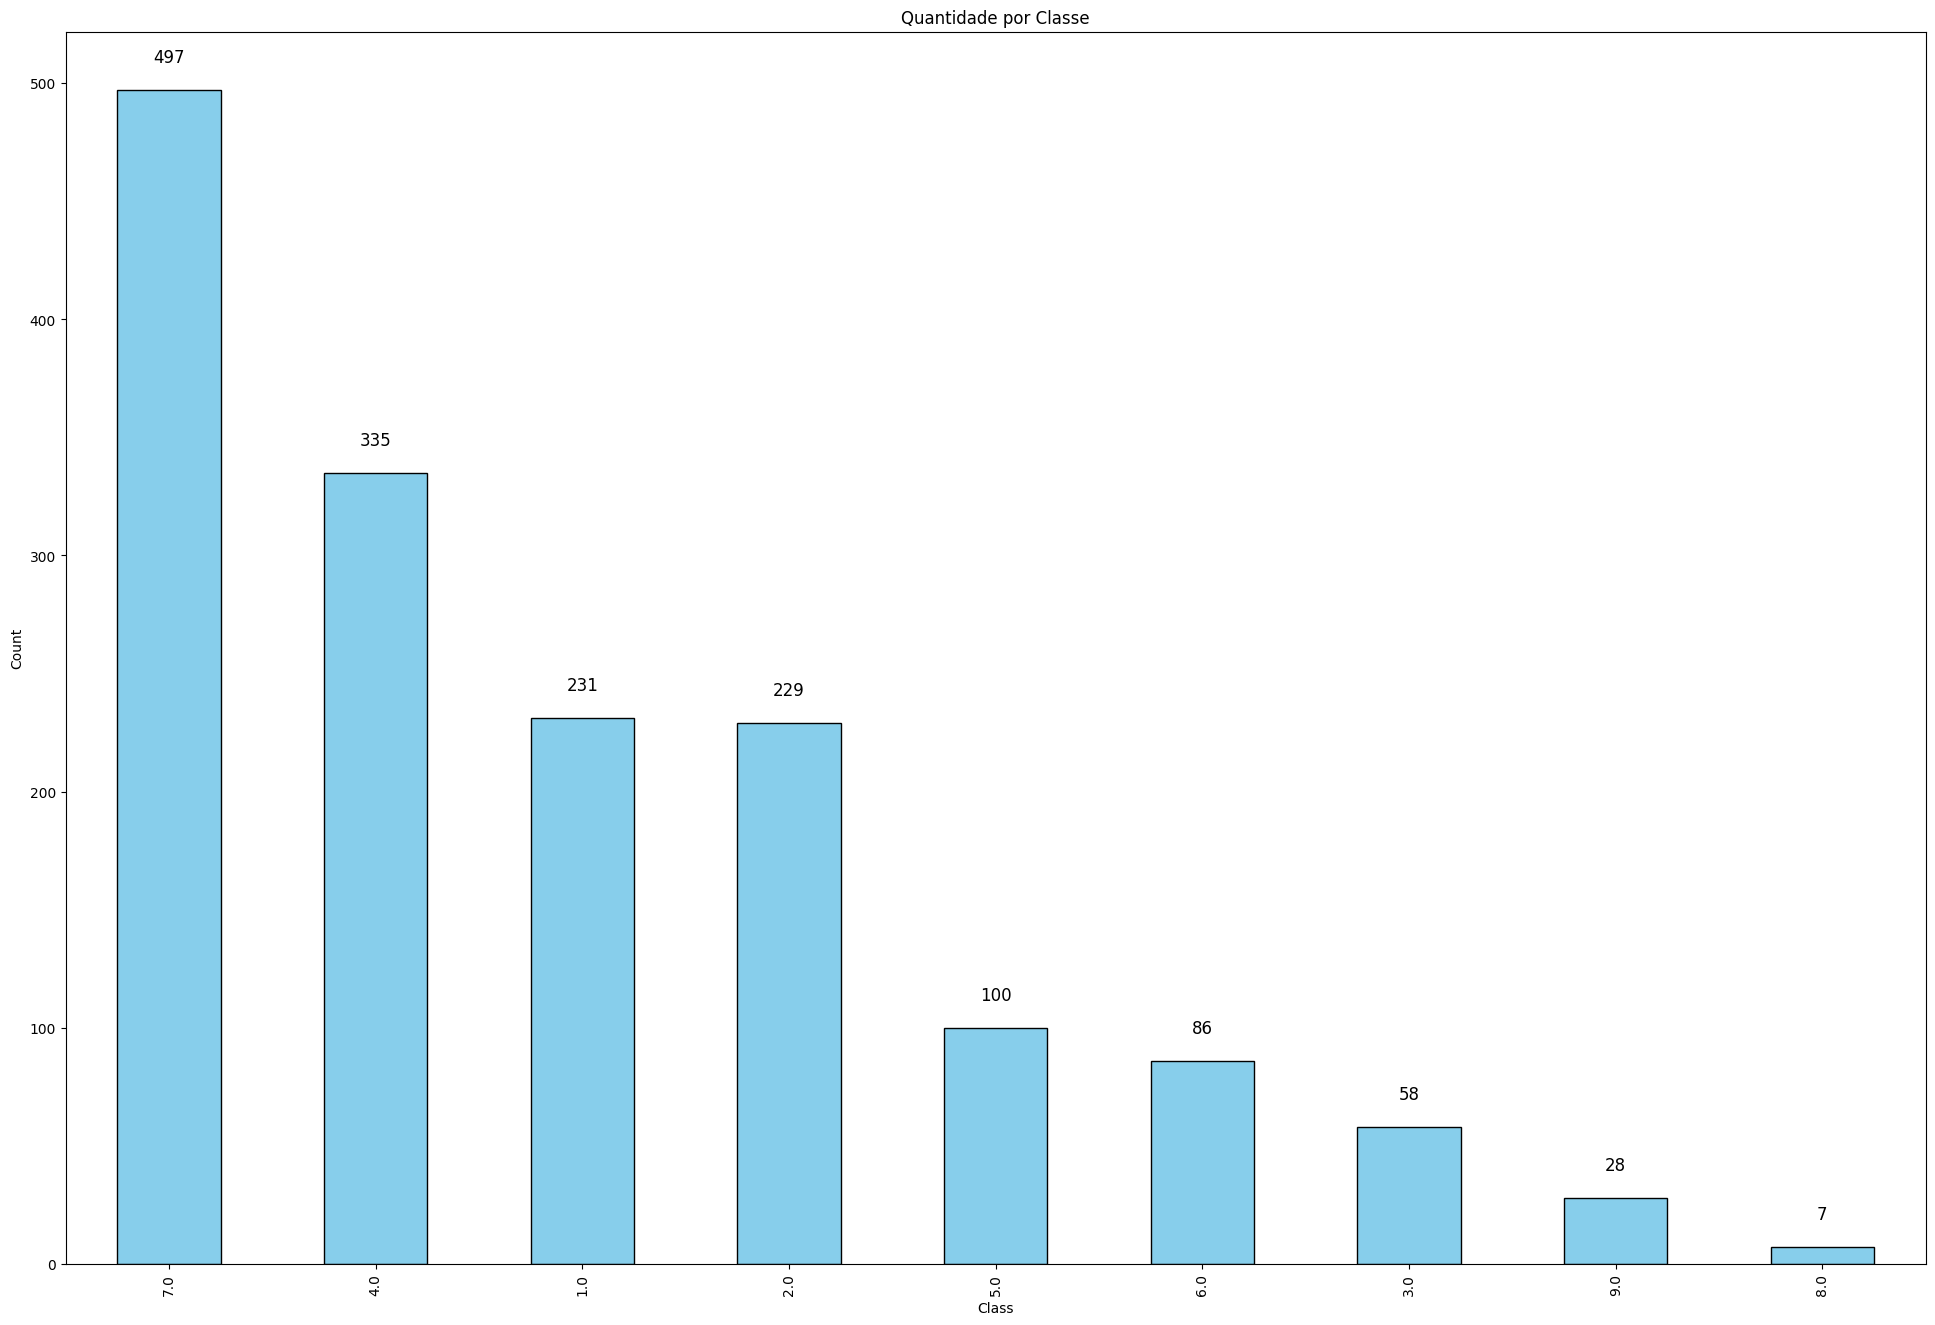

In [123]:
# Quantidade por classe novamente:
import matplotlib.pyplot as plt

# Quantidade por classe
plt.figure(figsize=(24, 16))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Quantidade por Classe")

# Contagem dos valores
count_values_genes_type = geral_dataset_train["Class"].value_counts()

# Plotar gráfico de barras
ax = count_values_genes_type.plot(kind="bar", color="skyblue", edgecolor="black")

# Adicionar rótulos (valores) nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posição X
        p.get_height() + 10,  # Posição Y (um pouco acima da barra)
        int(p.get_height()),  # Valor do rótulo
        ha="center",  # Centralizar horizontalmente
        va="bottom",  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

plt.show()

In [124]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

In [125]:
from sklearn.model_selection import train_test_split

x = numerical_dataset.drop("Class", axis=1)
y = numerical_dataset["Class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

# Exibir distribuição inicial
print("Distribuição antes do SMOTE:", Counter(y_train))

# SMOTE apenas para as classes especificadas (1, 2, 3, 5, 6, 8 e 9)
smote = SMOTE(sampling_strategy={1.0: 360, 2.0: 355, 3.0: 290, 4.0: 400, 5.0: 310, 6: 300, 8.0: 280, 9: 295}, random_state=42, k_neighbors=4)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Exibir distribuição após o SMOTE
print("Distribuição após o SMOTE:", Counter(y_train_resampled))

# Criar novo DataFrame com os dados balanceados (opcional)
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=["Class"])
balanced_dataset = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

Distribuição antes do SMOTE: Counter({7.0: 397, 4.0: 268, 1.0: 185, 2.0: 183, 5.0: 80, 6.0: 69, 3.0: 46, 9.0: 22, 8.0: 6})
Distribuição após o SMOTE: Counter({4.0: 400, 7.0: 397, 1.0: 360, 2.0: 355, 5.0: 310, 6.0: 300, 9.0: 295, 3.0: 290, 8.0: 280})


Resolver classes que tem apenas uma linha

In [126]:
# # Filtrar classes com pelo menos 2 amostras
# valid_classes = [cls for cls, count in Counter(y_train).items() if count >= 2]
# X_train_filtered = X_train[y_train.isin(valid_classes)]
# y_train_filtered = y_train[y_train.isin(valid_classes)]

# # Filtrar classes com pelo menos 2 amostras
# sampling_strategy = {cls: 20 for cls, count in Counter(y_train_filtered).items() if cls in [2, 3, 5, 8]}

# # Aplicar SMOTE
# smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train_filtered)

In [127]:
balanced_dataset.shape

(2987, 222)

In [128]:
balanced_dataset.head(10)

ID  GeneId  VariationId   6a  aberr  accord  activ  addit  adhes  \
0  1063.0    78.0        973.0  0.0    0.0     0.0    0.0    0.0    0.0   
1  1376.0   112.0         32.0  0.0    0.0     0.0    0.0    0.0    0.0   
2   729.0    56.0        671.0  0.0    0.0     0.0    0.0    0.0    0.0   
3   934.0    69.0        859.0  0.0    0.0     0.0    0.0    0.0    0.0   
4   969.0    72.0        888.0  0.0    0.0     0.0    0.0    0.0    0.0   
5   114.0    16.0        101.0  0.0    0.0     0.0    0.0    0.0    0.0   
6  1635.0   129.0       1488.0  0.0    0.0     0.0    0.0    0.0    0.0   
7  1327.0   107.0       1203.0  0.0    0.0     0.0    0.0    0.0    0.0   
8  2071.0   179.0       1883.0  0.0    0.0     0.0    0.0    0.0    0.0   
9   145.0    22.0        126.0  0.0    0.0     0.0    0.0    0.0    0.0   

   affect   ag  age   al  allel  also  although  amino  among  analysi  \
0     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
1     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
2     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
3     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
4     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
5     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
6     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
7     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
8     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
9     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   

   analyz  assay  associ  avail    b  base  bind   bp  breast    c  cancer  \
0     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
1     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
2     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
3     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
4     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
5     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
6     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
7     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
8     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
9     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   

   canon  case  cbl  ccbl  cell  cellcel  chang  class  clinic  colorect  \
0    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
1    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
2    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
3    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
4    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
5    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
6    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
7    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
8    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
9    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   

   common  compar  complex  construct  control  could  cryptic  cycl  damag  \
0     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
1     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
2     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
3     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
4     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
5     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
6     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
7     0.0     0.0      0.0        0.0 

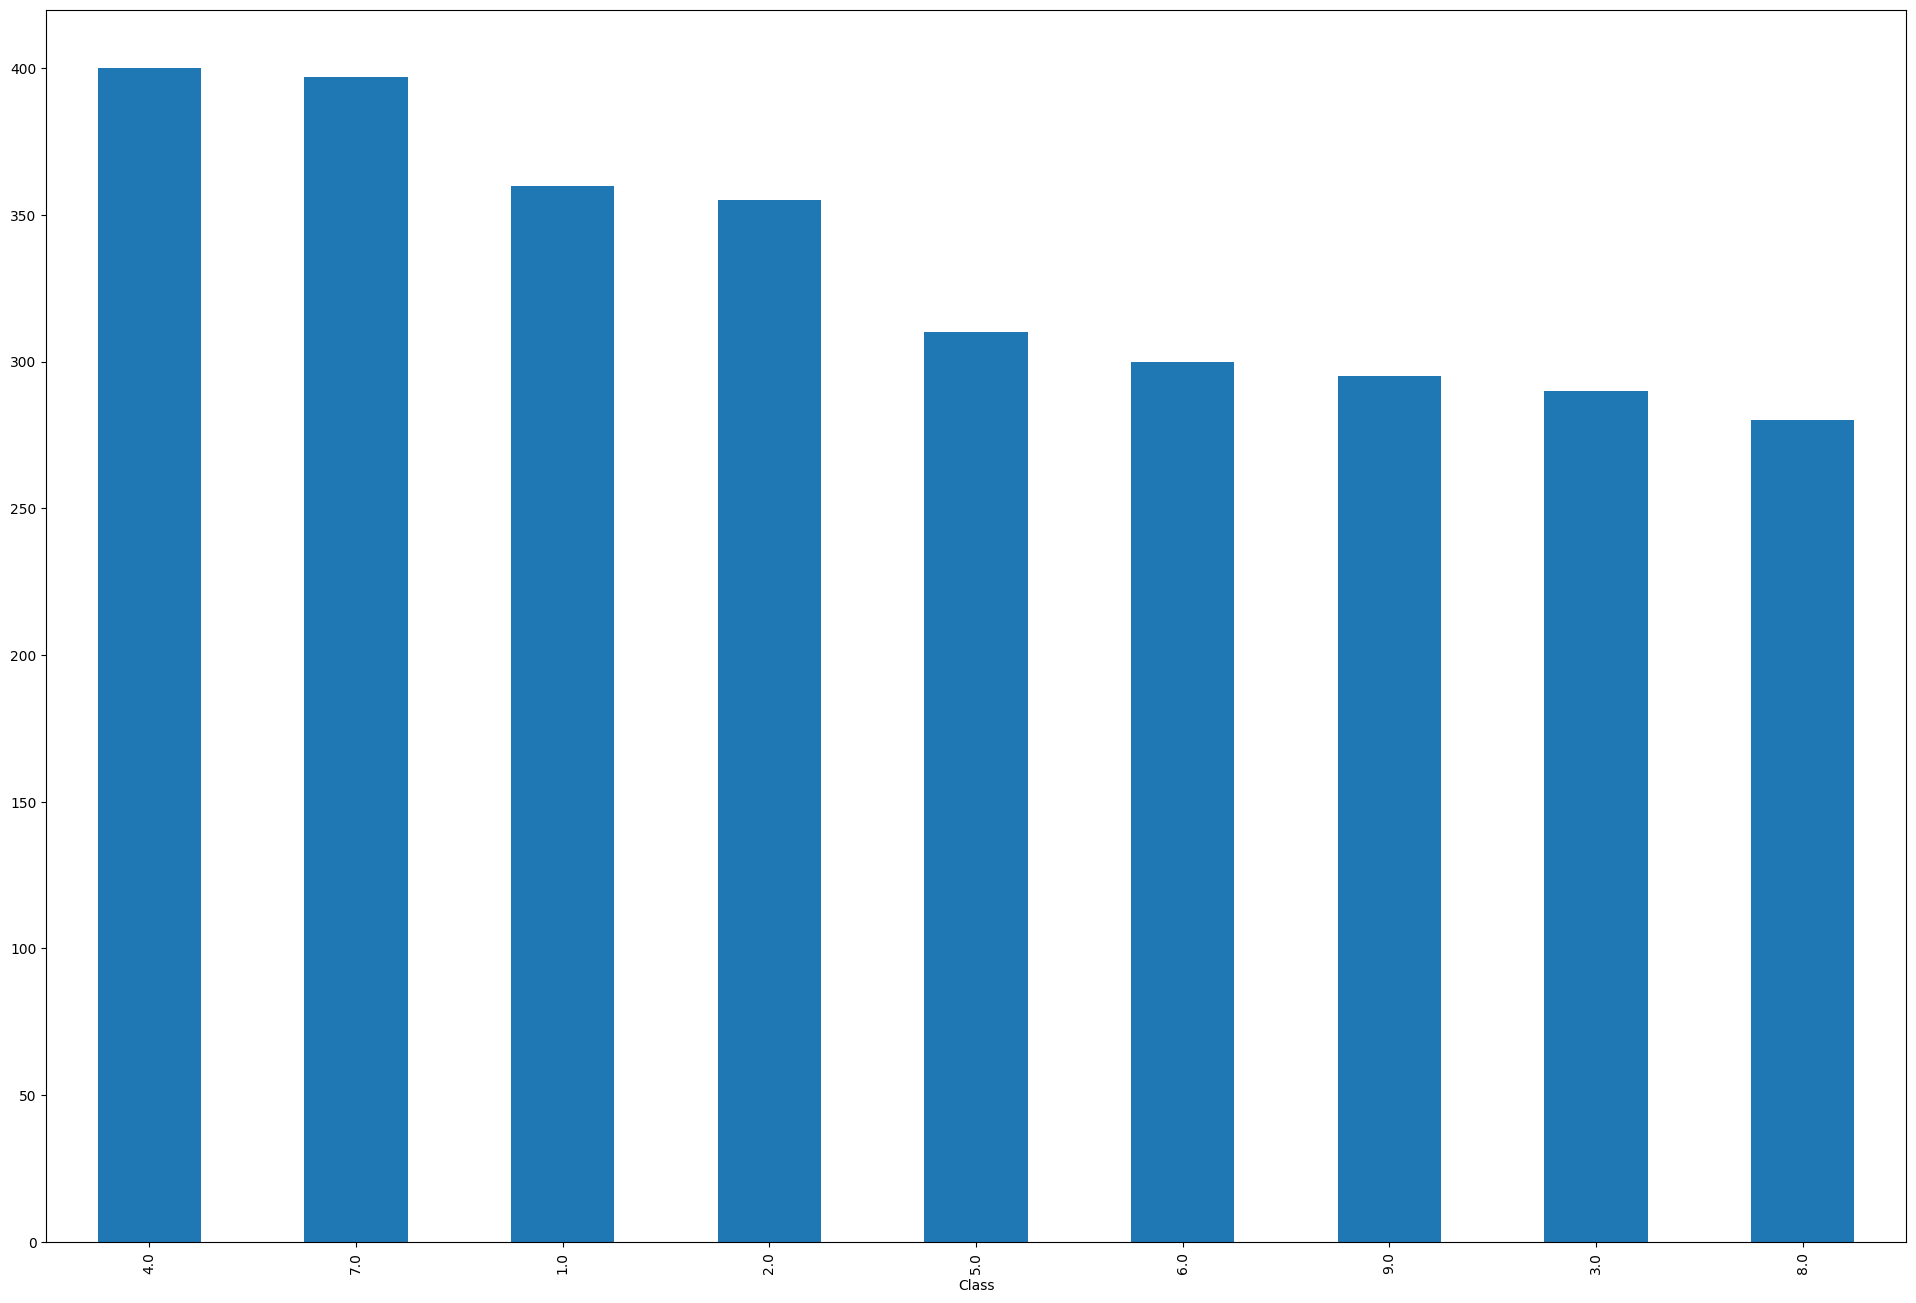

In [129]:
# Quantidade por classe novamente:
plt.figure(figsize = (24,16))
plt.xlabel("Class")

count_values_genes_type = balanced_dataset["Class"].value_counts()
count_values_genes_type.plot(kind="bar")

plt.show()

<Axes: >

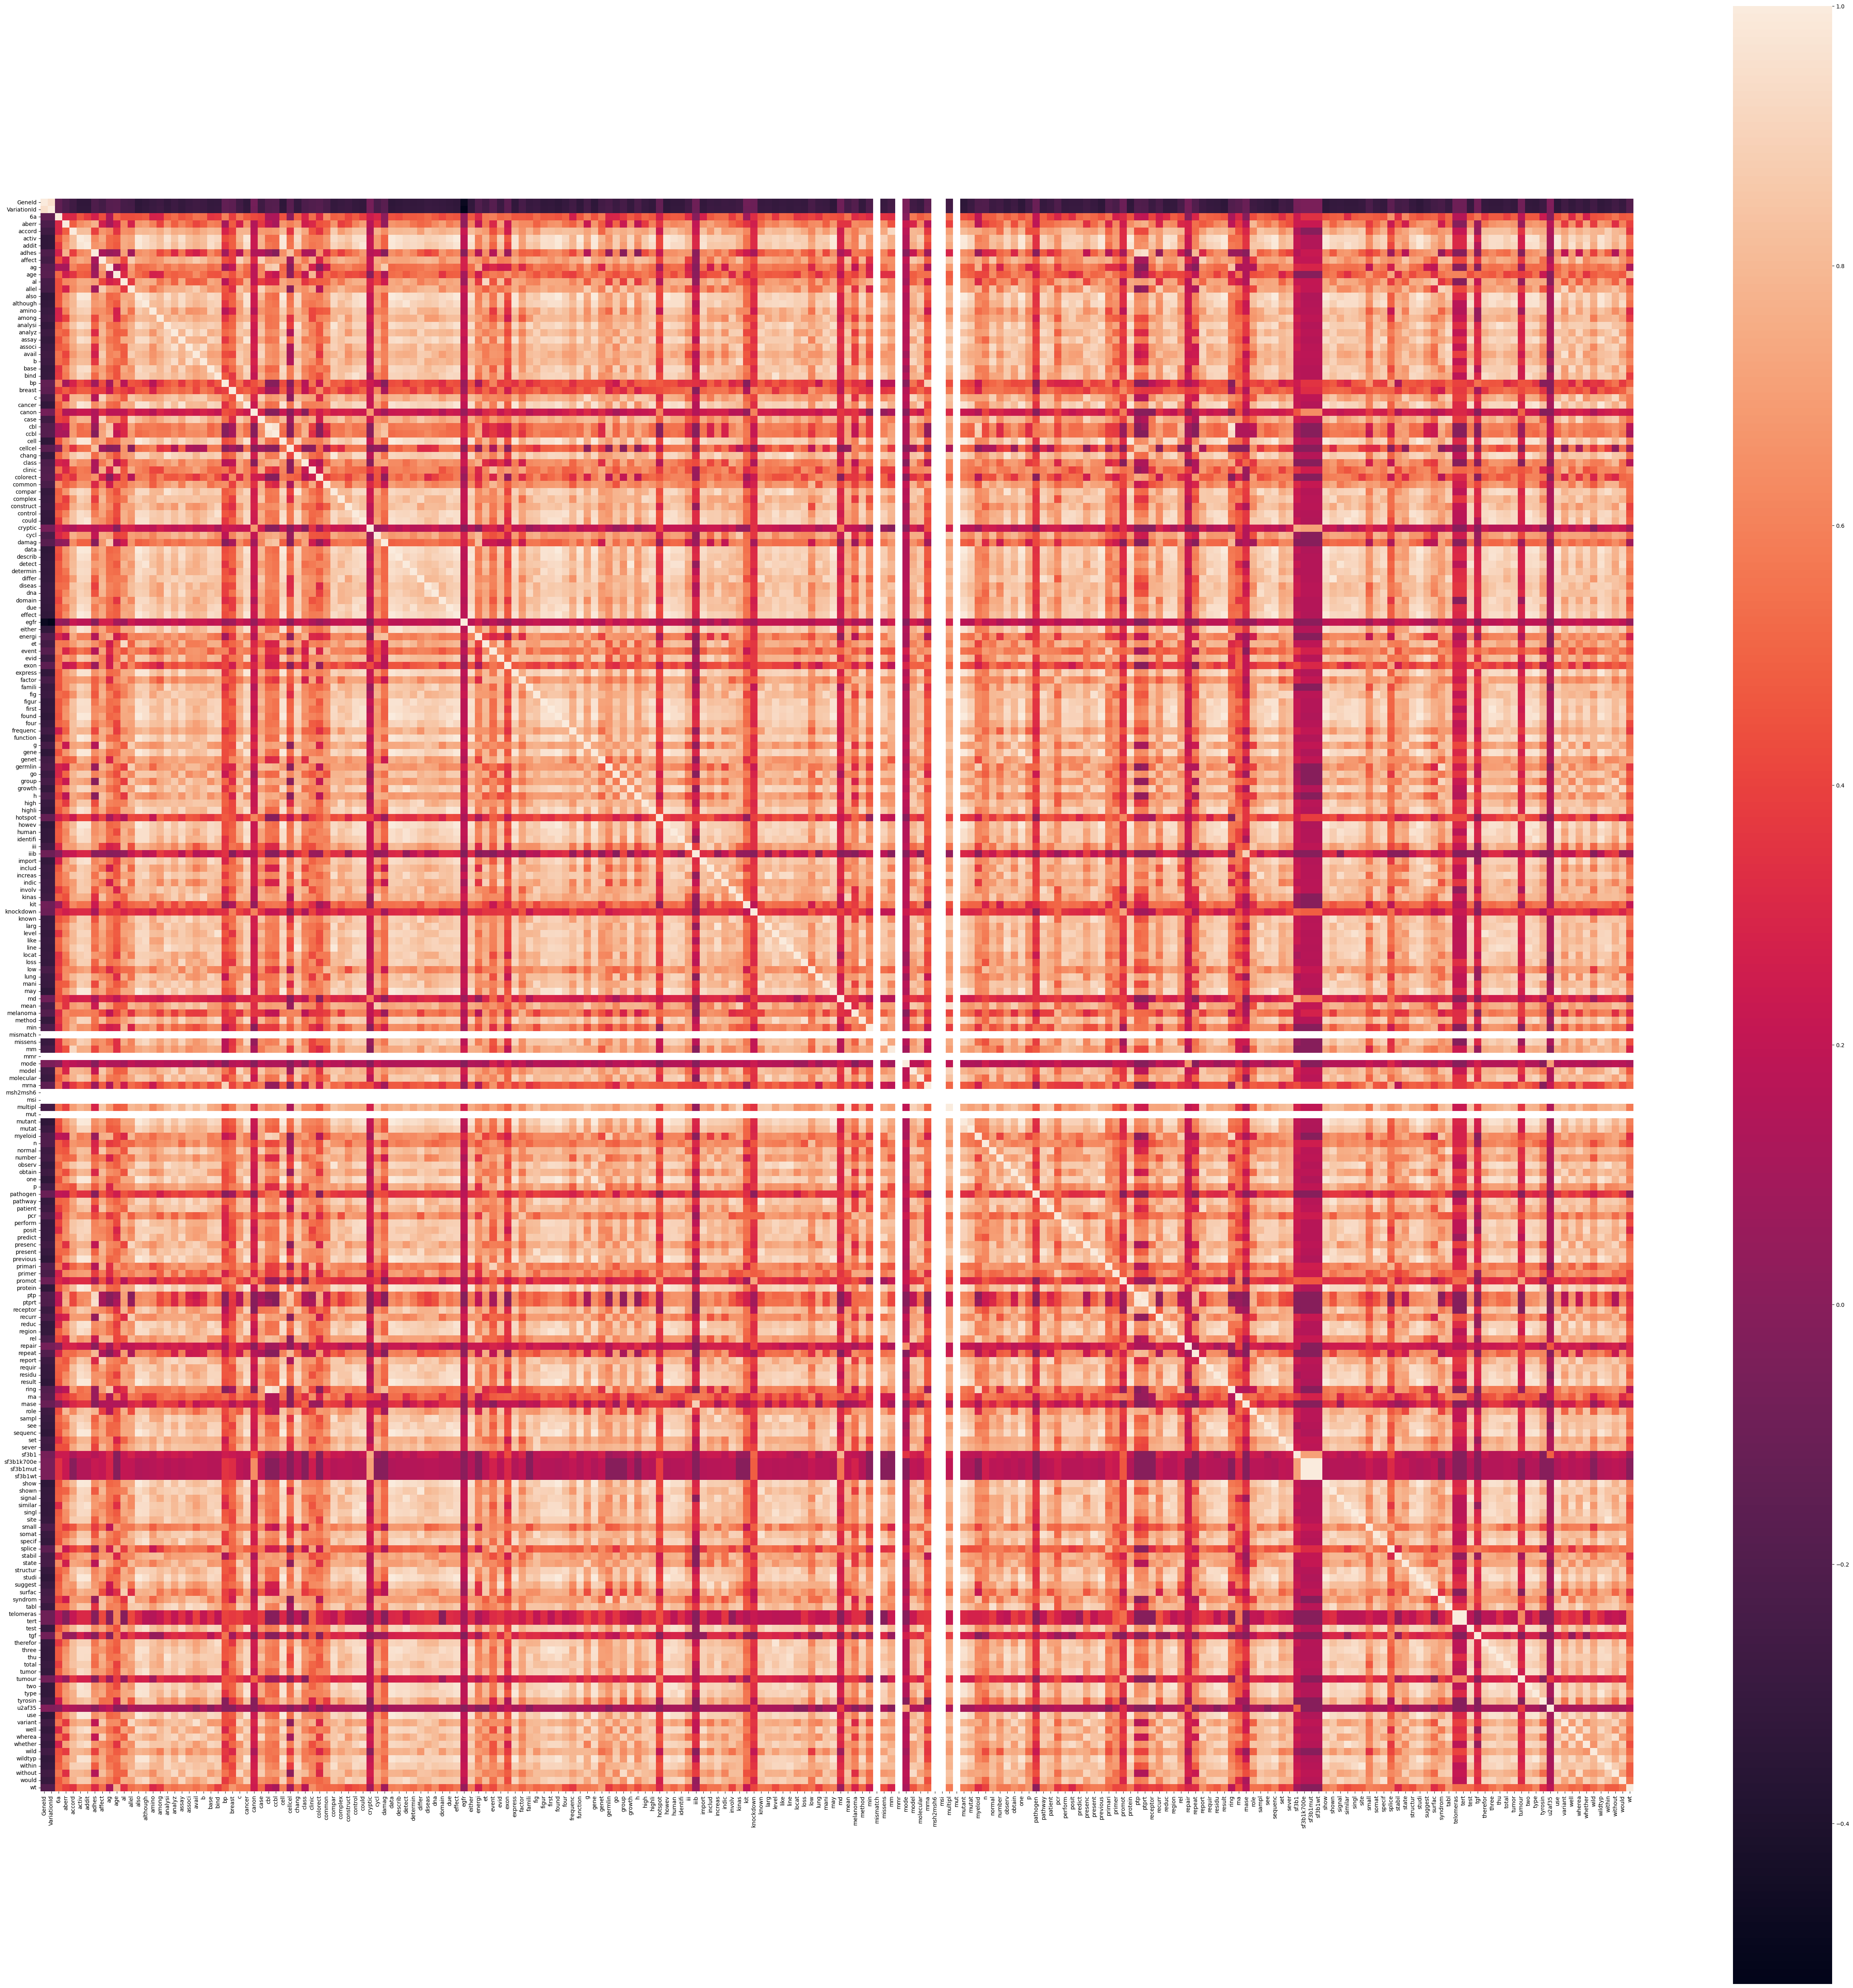

In [130]:
# Matriz de Correlação:
#matriz de correlação:
plt.figure(figsize = (64,64))

columns_not_used_to_train = ["ID", "Gene", "Variation", "Class", "Text", "TextCleaned", "tokens"]

columns_to_train = [col for col in balanced_dataset.columns if col not in columns_not_used_to_train]

sns.heatmap(balanced_dataset[columns_to_train].corr(), vmax=1., square=True)

## Criação do modelo

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

In [132]:
def criar_modelo_e_treinar(epochss=100):
    columns_not_used_to_train = ["ID", "Gene", "Variation", "Class", "Text", "TextCleaned", "tokens"]

    columns_to_train = [col for col in balanced_dataset.columns if col not in columns_not_used_to_train]
    # print(columns_to_train)
    
    # geral_dataset_train['TextMean'] = geral_dataset_train['TextVectors'].apply(lambda x: np.mean(x))
   
    x = balanced_dataset[columns_to_train]
    y = balanced_dataset["Class"]

    x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    y_train = y_train - 1
    y_test = y_test - 1

    y_train = to_categorical(y_train, num_classes=9)
    y_test = to_categorical(y_test, num_classes=9)

    print(np.any(np.isnan(x_train)))
    print(np.any(np.isinf(x_train)))
    print(np.any(np.isnan(y_train)))
    print(np.any(np.isinf(y_train)))

    model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),  # Entrada do modelo
        
        # Dense(1024, activation="relu", kernel_initializer=HeNormal()),
        # BatchNormalization(),
        # Dropout(0.2),
        
        Dense(512, activation="relu", kernel_initializer=HeNormal()),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(256, activation="relu", kernel_initializer=HeNormal()),
        BatchNormalization(),
        # Dropout(0.1),
        
        Dense(128, activation="relu", kernel_initializer=HeNormal()),
        BatchNormalization(),
        Dropout(0.1),
        
        Dense(64, activation="relu", kernel_initializer=HeNormal()),
        BatchNormalization(),
        # Dropout(0.1),
        
        # Dense(32, activation="relu", kernel_initializer=HeNormal()),
        # BatchNormalization(),
        # Dropout(0.2),
        
        # Dense(16, activation="relu", kernel_initializer=HeNormal()),
        # BatchNormalization(),
        # Dropout(0.1),
        
        # Dense(9, activation="relu", kernel_initializer=HeNormal()),
        # BatchNormalization(),
        # Dropout(0.2),

        # Dense(4, activation="relu", kernel_initializer=HeNormal()),
        # BatchNormalization(),
        # Dropout(0.2),
        
        Dense(9, activation="softmax")  # Ajuste da saída para classificação categórica
    ]
    )

    optimizer = Adam(learning_rate=0.0001)
    
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    y_train_labels = np.argmax(y_train, axis=1)

    history = model.fit(x_train, y_train, epochs=epochss, batch_size=256, validation_data=(x_test, y_test))

    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"\n\nLoss Model: {loss:.4f},\nAccuracy Model: {accuracy:.4f}\n")

    predictions = model.predict(x_test)
    predicted_classes = predictions.argmax(axis=1)
    print("Previsões:", predicted_classes)

    # predictions = (model.predict(x_test) > 0.5).astype(int)
    # print("Previsões:", predictions.flatten())

In [133]:
criar_modelo_e_treinar(2000)

False
False
False
False
Epoch 1/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1258 - loss: 2.5825 - val_accuracy: 0.1304 - val_loss: 2.2599
Epoch 2/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1679 - loss: 2.3969 - val_accuracy: 0.2007 - val_loss: 2.1815
Epoch 3/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2055 - loss: 2.2867 - val_accuracy: 0.2258 - val_loss: 2.1345
Epoch 4/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2007 - loss: 2.2488 - val_accuracy: 0.2324 - val_loss: 2.1097
Epoch 5/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2127 - loss: 2.1839 - val_accuracy: 0.2224 - val_loss: 2.0935
Epoch 6/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2327 - loss: 2.0985 - val_accuracy: 0.2207 - val_loss: 2.0779
Epoch 7/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2536 - loss: 2.0718 - val_accuracy: 0.2425 - val_loss: 2.0686
Epoch 8/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2479 - loss: 

In [134]:
balanced_dataset.head(5)

ID  GeneId  VariationId   6a  aberr  accord  activ  addit  adhes  \
0  1063.0    78.0        973.0  0.0    0.0     0.0    0.0    0.0    0.0   
1  1376.0   112.0         32.0  0.0    0.0     0.0    0.0    0.0    0.0   
2   729.0    56.0        671.0  0.0    0.0     0.0    0.0    0.0    0.0   
3   934.0    69.0        859.0  0.0    0.0     0.0    0.0    0.0    0.0   
4   969.0    72.0        888.0  0.0    0.0     0.0    0.0    0.0    0.0   

   affect   ag  age   al  allel  also  although  amino  among  analysi  \
0     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
1     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
2     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
3     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   
4     0.0  0.0  0.0  0.0    0.0   0.0       0.0    0.0    0.0      0.0   

   analyz  assay  associ  avail    b  base  bind   bp  breast    c  cancer  \
0     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
1     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
2     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
3     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   
4     0.0    0.0     0.0    0.0  0.0   0.0   0.0  0.0     0.0  0.0     0.0   

   canon  case  cbl  ccbl  cell  cellcel  chang  class  clinic  colorect  \
0    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
1    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
2    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
3    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   
4    0.0   0.0  0.0   0.0   0.0      0.0    0.0    0.0     0.0       0.0   

   common  compar  complex  construct  control  could  cryptic  cycl  damag  \
0     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
1     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
2     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
3     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   
4     0.0     0.0      0.0        0.0      0.0    0.0      0.0   0.0    0.0   

   data  describ  detect  determin  differ  diseas  dna  domain  due  effect  \
0   0.0      0.0     0.0       0.0     0.0     0.0  0.0     0.0  0.0     0.0   
1   0.0      0.0     0.0       0.0     0.0     0.0  0.0     0.0  0.0     0.0   
2   0.0      0.0     0.0       0.0     0.0     0.0  0.0     0.0  0.0     0.0   
3   0.0      0.0     0.0       0.0     0.0     0.0  0.0     0.0  0.0     0.0   
4   0.0      0.0     0.0       0.0     0.0     0.0  0.0     0.0  0.0     0.0   

   egfr  either  energi   et  event  evid  exon  express  factor  famili  fig  \
0   0.0     0.0     0.0  0.0    0.0   0.0   0.0      0.0     0.0     0.0  0.0   
1   0.0     0.0     0.0  0.0    0.0   0.0   0.0      0.0     0.0     0.0  0.0   
2   0.0     0.0     0.0  0.0    0.0   0.0   0.0      0.0     0.0     0.0  0.0   
3   0.0     0.0     0.0  0.0    0.0   0.0   0.0      0.0     0.0     0.0  0.0   
4   0.0     0.0     0.0  0.0    0.0   0.0   0.0      0.0     0.0     0.0  0.0   

   figur  first  found  four  frequenc  function    g  gene  genet  germlin  \
0    0.0    0.0    0.0   0.0       0.0       0.0  0.0   0.0    0.0      0.0   
1    0.0    0.0    0.0   0.0       0.0       0.0  0.0   0.0    0.0      0.0   
2    0.0    0.0    0.0   0.0       0.0       0.0  0.0   0.0    0.0      0.0   
3    0.0    0.0    0.0   0.0       0.0       0.0  0.0   0.0    0.0      0.0   
4    0.0    0.0    0.0   0.0       0.0       0.0  0.0   0.0    0.0      0.0   

    go  group  growth    h  high  highli  hotspot  howev  human  identifi  \
0  0.0    0.0     0.0  0.0   0.0     0.0      0.0    0.0    0.0       0.0   
1  0.0    0.0     0.0  0.0   0.0     0.0      0.0    0.0    0.0       0.0   
2  0.0    0.0     0.0  0.0   0.0    

## Criação Do Modelo Com Validação Cruzada(Cross Validation) e outras métricas de avaliação

In [135]:
from tensorflow.keras.metrics import AUC, Precision, Recall

def create_basic_model(input_dim):
    model = Sequential(
        [
            Input(shape=(input_dim,)),
            Dense(516, activation="relu", kernel_initializer=HeNormal()),
            BatchNormalization(),
            Dropout(0.2),
            Dense(256, activation="relu", kernel_initializer=HeNormal()),
            BatchNormalization(),
            # Dropout(0.2),
            Dense(128, activation="relu", kernel_initializer=HeNormal()),
            BatchNormalization(),
            Dropout(0.1),
            Dense(64, activation="relu", kernel_initializer=HeNormal()),
            BatchNormalization(),
            # Dropout(0.1),
            Dense(9, activation="softmax")  # 9 classes
        ]
    )
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=[
        "accuracy",          # Acurácia
        AUC(name="auc"),     # Área sob a curva ROC
        Precision(name="precision"),  # Precisão
        Recall(name="recall")         # Revocação
    ])
    return model

In [138]:
# Configuração com KFold
from sklearn.model_selection import KFold
import numpy as np

def configure_cross_validation_with_epochs(k=5, e=500):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    columns_not_used_to_train = ["ID", "Gene", "Variation", "Class", "Text", "TextCleaned", "tokens"]
    columns_to_train = [col for col in balanced_dataset.columns if col not in columns_not_used_to_train]

    x = balanced_dataset[columns_to_train]
    y = balanced_dataset["Class"] - 1  # Ajustar classes para [0-8]

    x = StandardScaler().fit_transform(x)
    y = to_categorical(y, num_classes=9)

    fold_accuracies = []
    fold_losses = []
    fold_precisions = []
    fold_recalls = []
    fold_aucs = []

    for train_index, val_index in kf.split(x):
        x_train , x_val = x[train_index], x[val_index]
        y_train , y_val = y[train_index], y[val_index]

        # criar e treinar o modelo
        model = create_basic_model(input_dim=x_train.shape[1])
        model.fit(x_train, y_train, epochs=e, batch_size=256, verbose=2, validation_data=(x_val, y_val))

        # Avaliar no fold atual
        results = model.evaluate(x_val, y_val, verbose=2)
        
        # Salvar as métricas nos respectivos dicionários
        fold_losses.append(results[0])
        fold_accuracies.append(results[1])
        fold_aucs.append(results[2])
        fold_precisions.append(results[3])
        fold_recalls.append(results[4])

        print("\n")
        print("------------------------------------------------------------------------------")
        print(train_index)
        print("\n")
        print("\n")

    # Resultados
    print(f"Validação cruzada (k={k}):")
    print(f"Acurácia Média: {np.mean(fold_accuracies):.4f}, Desvio padrão: {np.std(fold_accuracies):.4f}")
    print(f"AUCs Média: {np.mean(fold_aucs):.4f}, Desvio padrão: {np.std(fold_aucs):.4f}")
    print(f"Precisão Média: {np.mean(fold_precisions):.4f}, Desvio padrão: {np.std(fold_precisions):.4f}")
    print(f"Recall Média: {np.mean(fold_recalls):.4f}, Desvio padrão: {np.std(fold_recalls):.4f}")
    print("\n")
    

In [139]:
configure_cross_validation_with_epochs(k=5, e=1000)

Epoch 1/1000
10/10 - 2s - 204ms/step - accuracy: 0.1093 - auc: 0.5138 - loss: 2.6992 - precision: 0.0952 - recall: 0.0092 - val_accuracy: 0.1288 - val_auc: 0.5048 - val_loss: 2.5242 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/1000
10/10 - 0s - 9ms/step - accuracy: 0.1624 - auc: 0.5703 - loss: 2.4599 - precision: 0.3603 - recall: 0.0373 - val_accuracy: 0.0853 - val_auc: 0.5529 - val_loss: 2.3712 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/1000
10/10 - 0s - 9ms/step - accuracy: 0.1988 - auc: 0.5981 - loss: 2.3606 - precision: 0.4601 - recall: 0.0628 - val_accuracy: 0.1505 - val_auc: 0.5598 - val_loss: 2.2687 - val_precision: 0.0833 - val_recall: 0.0017
Epoch 4/1000
10/10 - 0s - 9ms/step - accuracy: 0.2273 - auc: 0.6353 - loss: 2.2061 - precision: 0.5865 - recall: 0.0837 - val_accuracy: 0.1622 - val_auc: 0.5658 - val_loss: 2.2058 - val_precision: 0.1905 - val_recall: 0.0067
Epoch 5/1000
10/10 - 0s - 9ms/step - accuracy: 0.2147 - auc: 0.6363 - loss: 2.1675

#### Coisas para melhorar:

##### Remover variáveis pouco relacionadas com Class e as demais classes, após a tokenização. Pois na matriz de correlação tem alguns pontos bem escuros

##### Dar um jeito de fazer GeneId e VariationId ter melhor correlação com as outras classes e a própria variável Class(Target)

##### Talvez deixar tokens mais relavantes além da frequencia de 300 como feito no código lá em cima. Quem sabe com fraquencia maior que 500(tokens mais relevancia)